# entropy

计算 Wikipedia 与 OpenAlex Graph 熵

In [ ]:
!pip install -U python-dotenv pymongo matplotlib scipy

In [2]:
import pymongo
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr
from dotenv import dotenv_values

env_config = dotenv_values("../.env")

# openAlex entropy

In [3]:
database_name = f"openalex_v{env_config['OPENALEX_VERSION']}"
openalex_entropy_collection = pymongo.MongoClient(env_config['Mongo_Url'])[database_name]["entropy"]
openalex_entropy_collection.count_documents({})

6847

data schema
```
{
	"_id" : ObjectId("674bff0c47a58e628808d5d1"),
	"statPercent" : 60,
	"endPercent" : 70,
	"graphSize" : 0,
	"rankType" : "current",
	"entropyType" : "struct",
	"entropy" : {
		"entropyin" : Double("0"),
		"entropyout" : Double("0"),
		"entropy" : Double("0"),
		"normalizeentropyin" : Double("0"),
		"normalizeentropyout" : Double("0"),
		"normalizeentropy" : NaN
	},
	"year" : 2022
},
```

```
{
	"_id" : ObjectId("674bff0c47a58e628808d5d2"),
	"statPercent" : 60,
	"endPercent" : 70,
	"graphSize" : 0,
	"rankType" : "current",
	"entropyType" : "degree",
	"entropy" : {
		"entropyin" : Double("0"),
		"entropyout" : Double("0"),
		"entropy" : Double("0")
	},
	"year" : 2022
},
```

In [37]:
# 范围统计
import collections 

start_year, end_year = 1970,2024

entropy_data_map = collections.defaultdict(lambda: [np.nan] * (end_year - start_year + 1) )

node_size_key = 'graph-size'
step_list =  [10,20,30,40,50,60,70,80]
# step_list.reverse()
for doc in openalex_entropy_collection.find():
    index = doc['year'] - start_year

    if index < 0:
        continue
    
    key = (doc['entropyType'], doc['rankType'], str(doc['statPercent']), str(doc['endPercent']))
    entropy_data_map[key][index] = doc['entropy']['entropy']
    
    if "struct" == doc['entropyType']:
        key = (doc['entropyType'], doc['rankType'], str(doc['statPercent']),str(doc['endPercent']),'normalize',)
        entropy_data_map[key][index] = doc['entropy']['normalizeentropy']
        
    key = ('size',str(doc['statPercent']), str(doc['endPercent']))
    entropy_data_map[key][index] = doc['graphSize']

len(entropy_data_map)

119

In [23]:
# import collections 

# start_year, end_year = 1970,2024

# entropy_data_map = collections.defaultdict(lambda: [np.nan] * (end_year - start_year + 1) )

# node_size_key = 'graph-size'
# step_list =  [1,5,10,20,40,60,80]
# # step_list.reverse()
# for doc in openalex_entropy_collection.find({"statPercent":0}):
#     index = doc['year'] - start_year

#     if index < 0:
#         continue
#     if doc['endPercent'] not in step_list:
#         continue
    
#     key = (doc['entropyType'], doc['rankType'], str(doc['endPercent']))
#     entropy_data_map[key][index] = doc['entropy']['entropy']
    
#     if "struct" == doc['entropyType']:
#         key = (doc['entropyType'], doc['rankType'],str(doc['endPercent']),'normalize',)
#         entropy_data_map[key][index] = doc['entropy']['normalizeentropy']
        
#     key = ('size', str(doc['endPercent']))
#     entropy_data_map[key][index] = doc['graphSize']

# len(entropy_data_map)

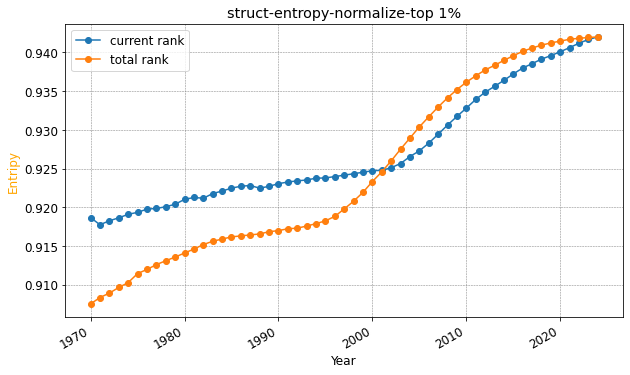

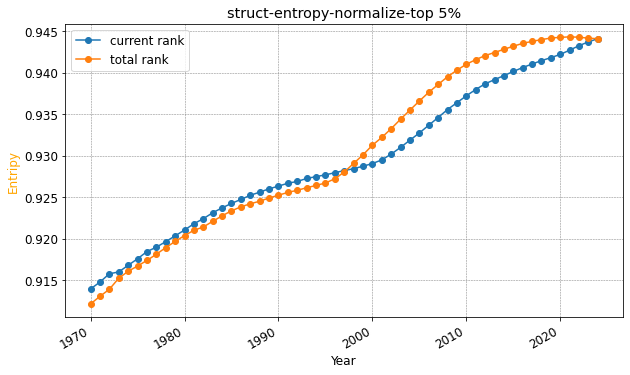

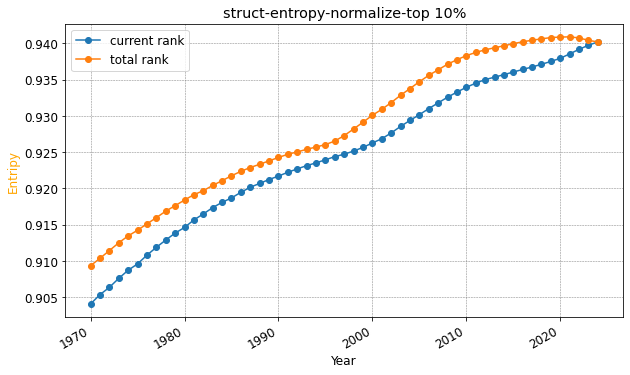

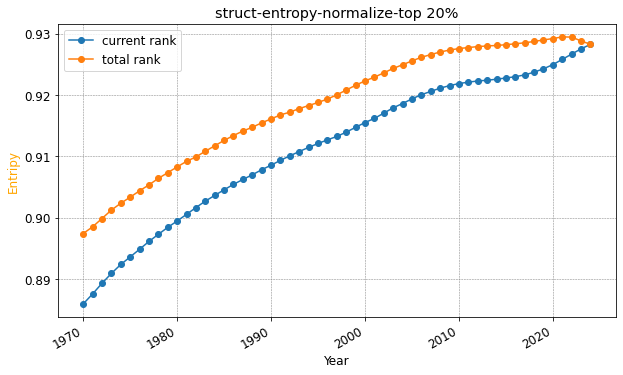

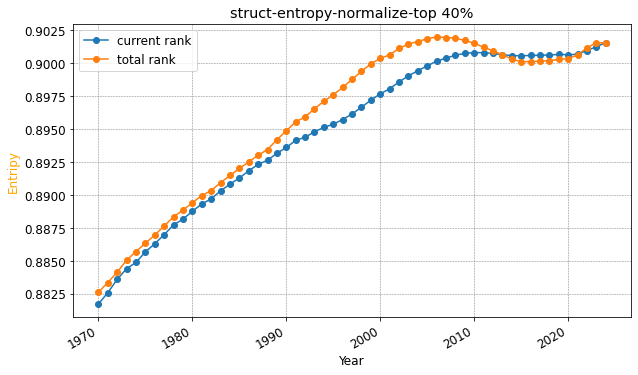

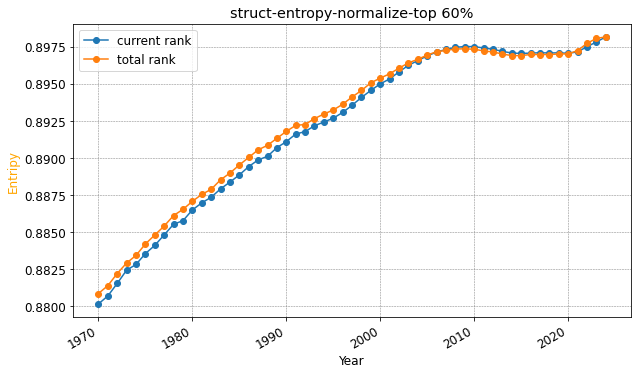

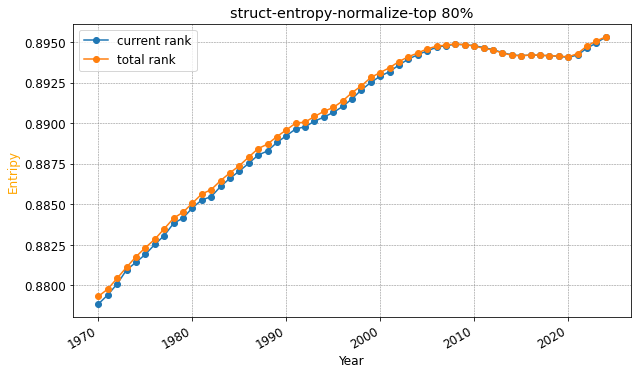

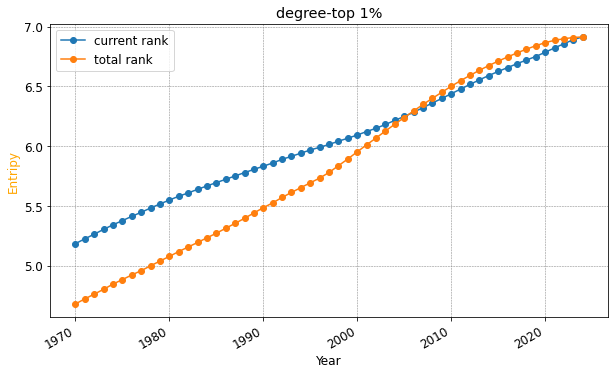

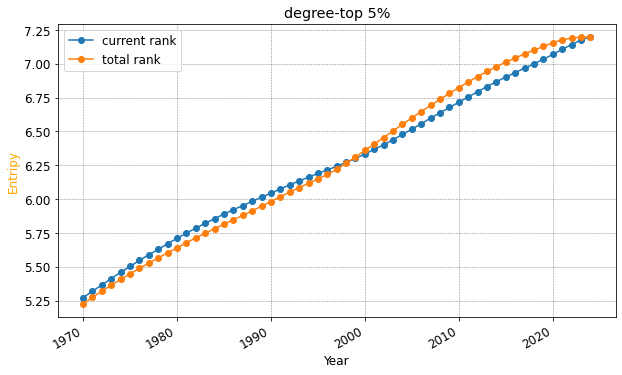

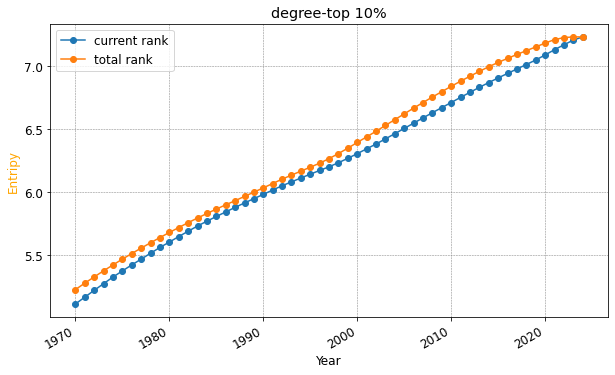

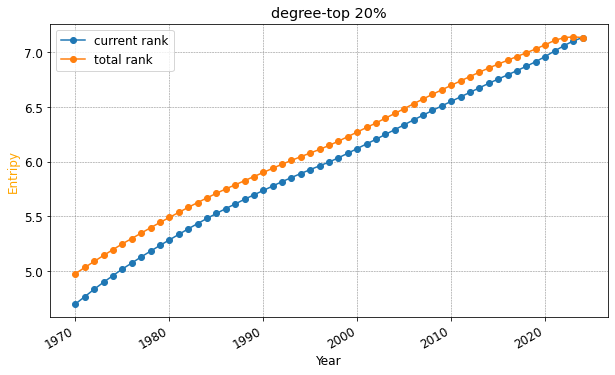

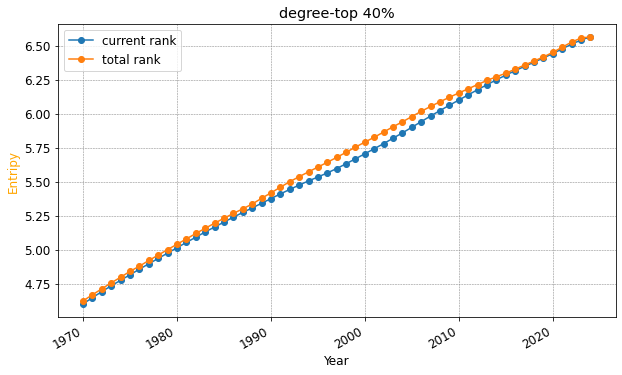

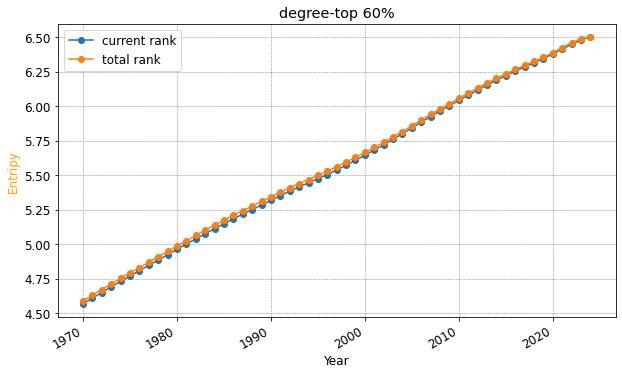

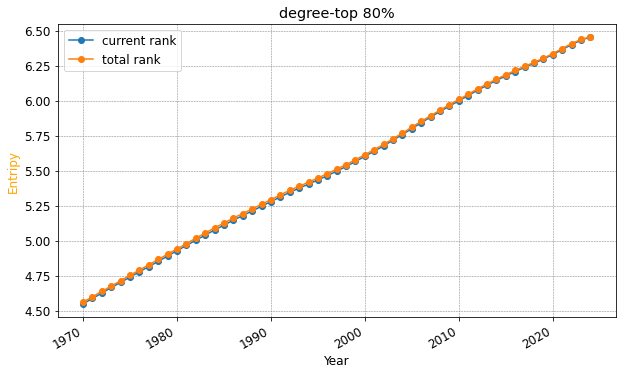

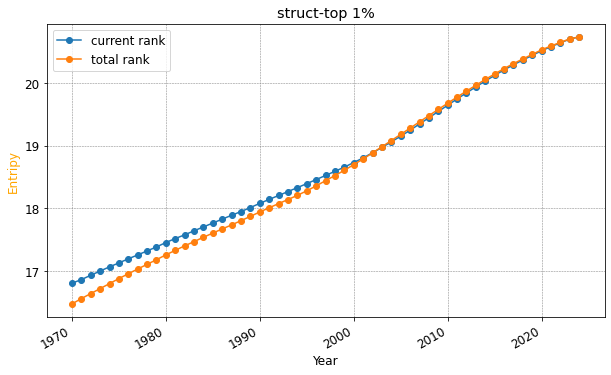

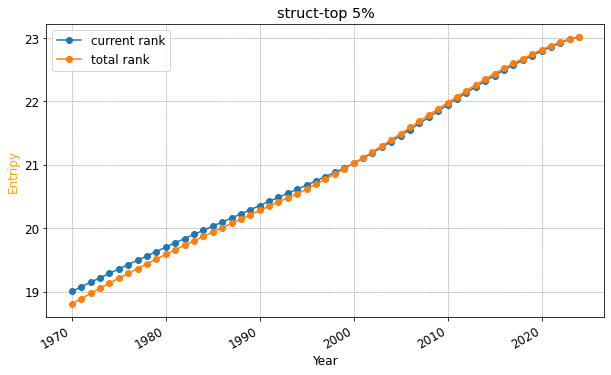

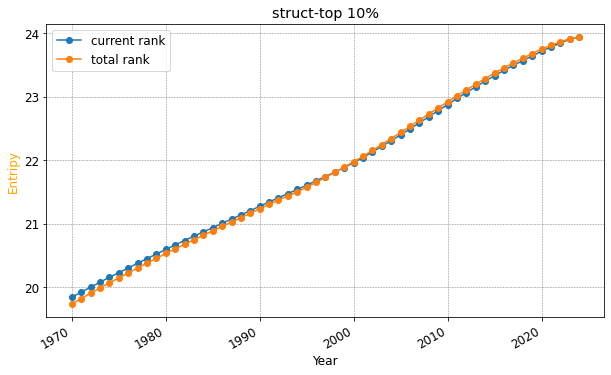

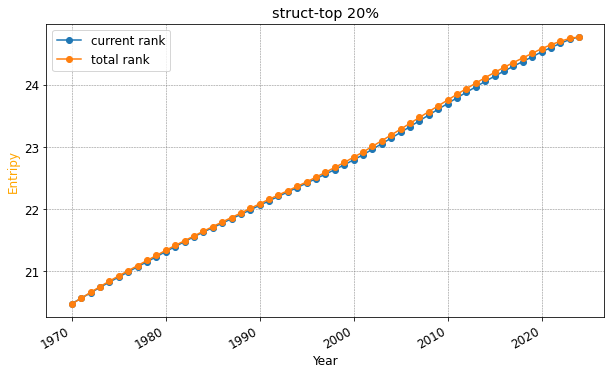

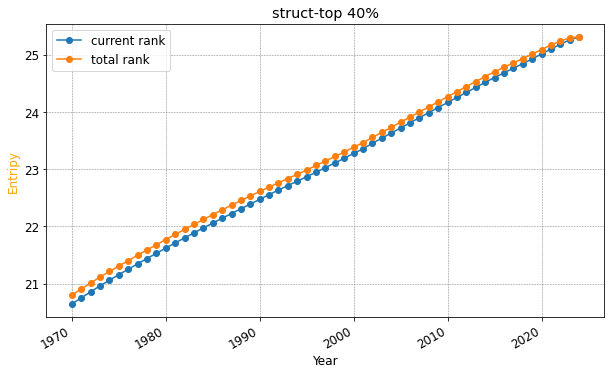

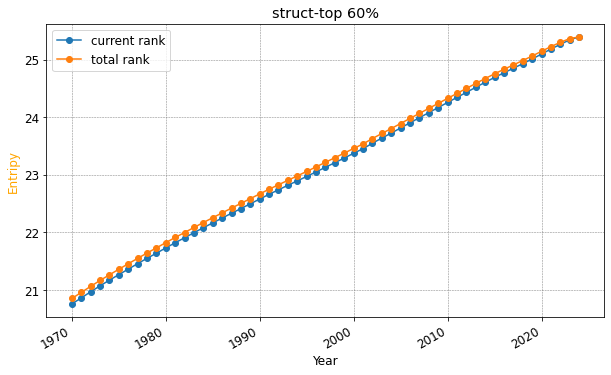

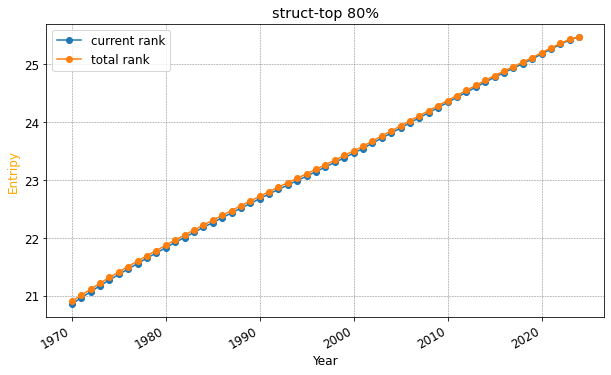

In [27]:


year_range = [year for year in range(start_year, end_year+1)]
node_size_key = 'graph-size'

plt.rcParams['font.size'] = 12

entropyType = "struct"

step_list =  [1,5,10,20,40,60,80]
for percent in step_list:

    fig, ax1 = plt.subplots(figsize=(10, 6))
    for rankType in ["current", "total"]:
        key = (entropyType, rankType,'0',  str(percent), 'normalize')
        ax1.plot(year_range, entropy_data_map[key], label=f"{key[1]} rank", marker="o")  # 第四条线
    ax1.legend()
    ax1.set_xlabel('Year')
    ax1.set_ylabel('Entripy', color='orange')
    plt.title(f"{entropyType}-entropy-normalize-top {percent}%")

    plt.grid(True,axis='both' , which='both', linestyle='--', linewidth=0.5, color='gray')
    # plt.grid(True)
    # 显示图表
    plt.gcf().autofmt_xdate()  # 自动旋转和调整日期标签
    # 添加标题和轴标签
    plt.show()
        

for entropyType in ["degree", "struct"]:
    for percent in step_list:
        fig, ax1 = plt.subplots(figsize=(10, 6))
        
        for rankType in ["current", "total"]:
            key = (entropyType, rankType,'0',  str(percent))
            ax1.plot(year_range, entropy_data_map[key], label=f"{key[1]} rank", marker="o")  # 第四条线
        ax1.legend()
        ax1.set_xlabel('Year')
        ax1.set_ylabel('Entripy', color='orange')
        plt.title(f"{entropyType}-top {percent}%")

        plt.grid(True,axis='both' , which='both', linestyle='--', linewidth=0.5, color='gray')
        # plt.grid(True)
        # 显示图表
        plt.gcf().autofmt_xdate()  # 自动旋转和调整日期标签
        # 添加标题和轴标签
        plt.show()
        

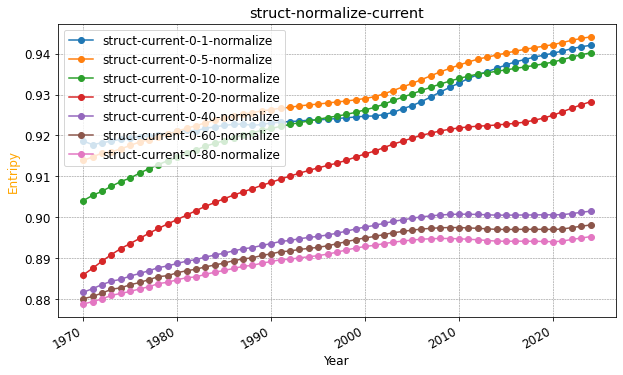

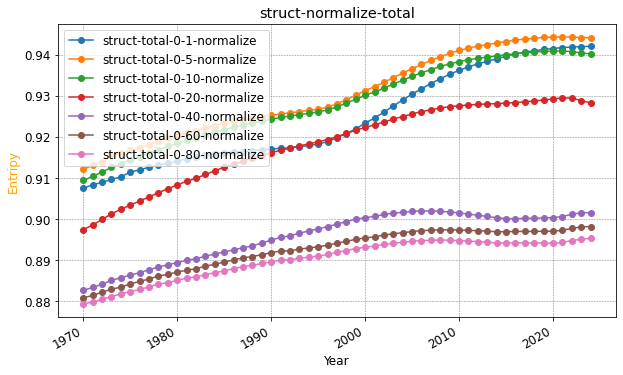

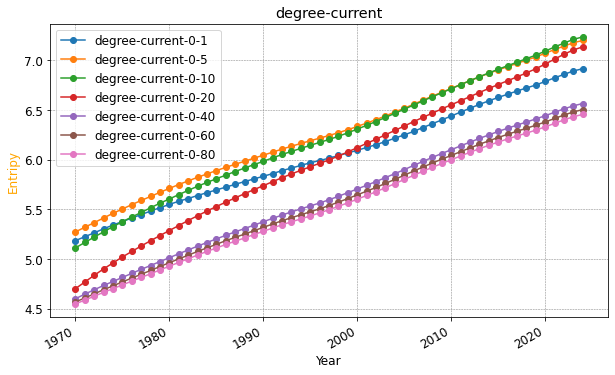

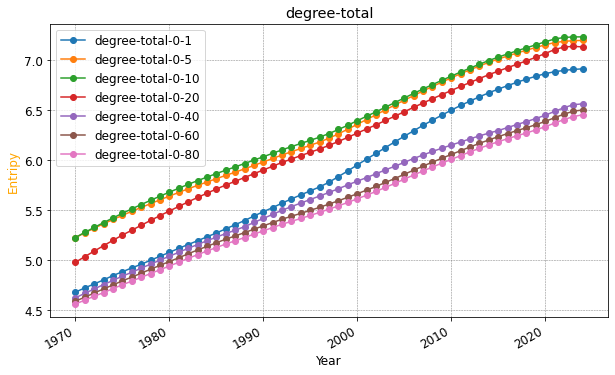

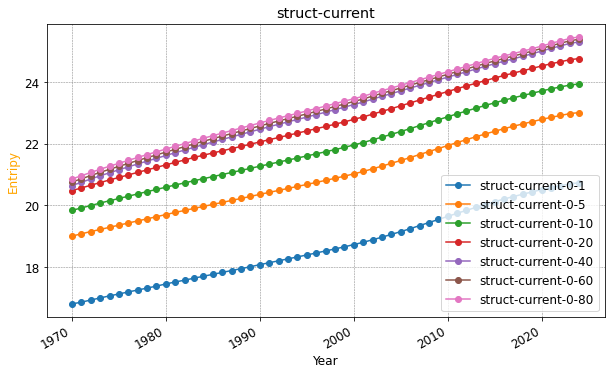

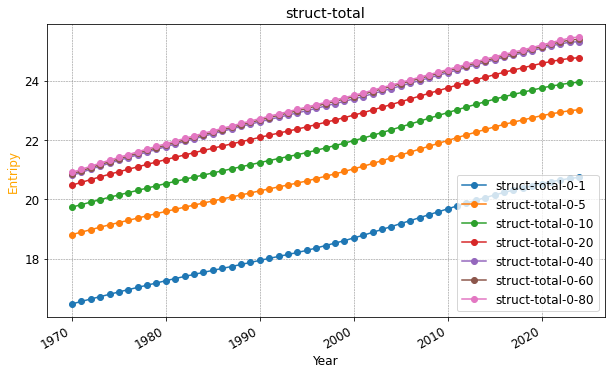

In [28]:


year_range = [year for year in range(start_year, end_year+1)]
node_size_key = 'graph-size'

plt.rcParams['font.size'] = 12

entropyType = "struct"
for rankType in ["current", "total"]:
    
    fig, ax1 = plt.subplots(figsize=(10, 6))
    for percent in step_list:
        key = (entropyType, rankType,'0', str(percent), 'normalize')
        ax1.plot(year_range, entropy_data_map[key], label="-".join(key), marker="o")  # 第四条线
    ax1.legend()
    ax1.set_xlabel('Year')
    ax1.set_ylabel('Entripy', color='orange')
    plt.title(f"{entropyType}-normalize-{rankType}")

    plt.grid(True,axis='both' , which='both', linestyle='--', linewidth=0.5, color='gray')
    # plt.grid(True)
    # 显示图表
    plt.gcf().autofmt_xdate()  # 自动旋转和调整日期标签
    # 添加标题和轴标签
    plt.show()
        

for entropyType in ["degree", "struct"]:
    for rankType in ["current", "total"]:
        
        fig, ax1 = plt.subplots(figsize=(10, 6))
        
        for percent in step_list:
            key = (entropyType, rankType,'0', str(percent))
            ax1.plot(year_range, entropy_data_map[key], label="-".join(key), marker="o")  # 第四条线
        ax1.legend()
        ax1.set_xlabel('Year')
        ax1.set_ylabel('Entripy', color='orange')
        plt.title(f"{entropyType}-{rankType}")

        plt.grid(True,axis='both' , which='both', linestyle='--', linewidth=0.5, color='gray')
        # plt.grid(True)
        # 显示图表
        plt.gcf().autofmt_xdate()  # 自动旋转和调整日期标签
        # 添加标题和轴标签
        plt.show()
        

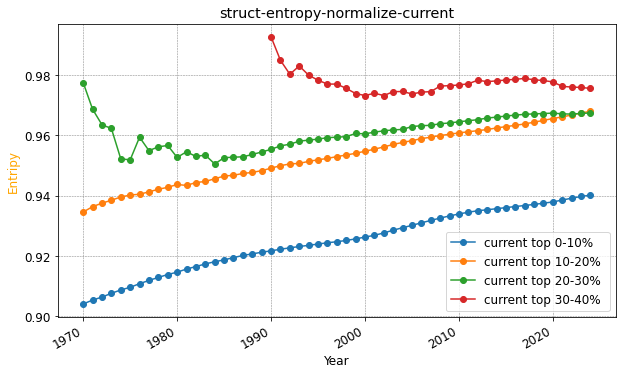

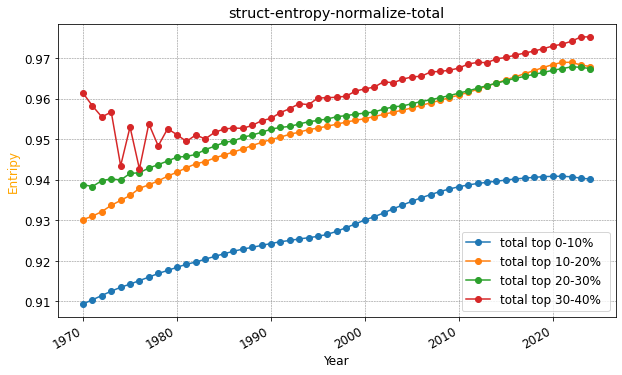

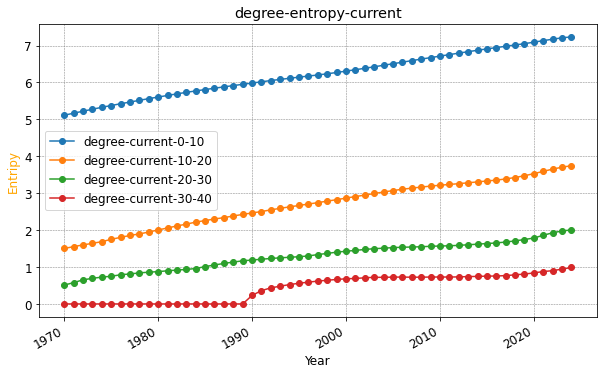

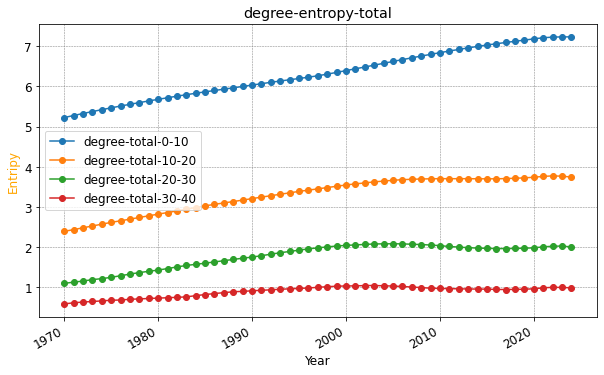

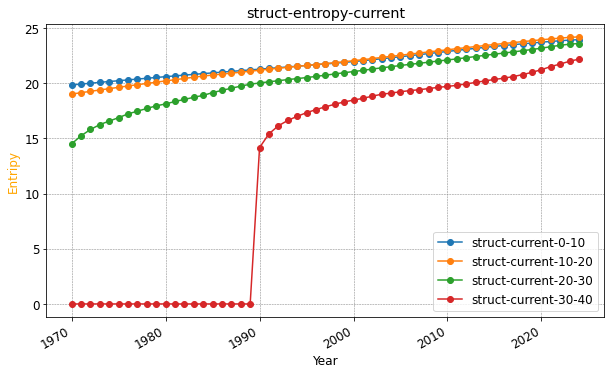

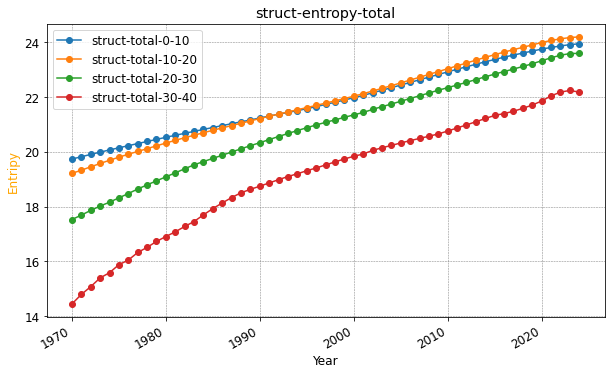

In [44]:
# 分成 scale 的统计

step_list =  [10,20,30,40,50,60,70,80]


year_range = [year for year in range(start_year, end_year+1)]
node_size_key = 'graph-size'

plt.rcParams['font.size'] = 12

entropyType = "struct"
for rankType in ["current", "total"]:
    
    fig, ax1 = plt.subplots(figsize=(10, 6))
    for percent in step_list:
        percent_start = percent - 10
        if percent_start >= 40:
            continue
        key = (entropyType, rankType,str(percent_start), str(percent), 'normalize')
        ax1.plot(year_range, entropy_data_map[key], label=f"{key[1]} top {key[2]}-{key[3]}% ", marker="o")  # 第四条线
    ax1.legend()
    ax1.set_xlabel('Year')
    ax1.set_ylabel('Entripy', color='orange')
    plt.title(f"{entropyType}-entropy-normalize-{rankType}")

    plt.grid(True,axis='both' , which='both', linestyle='--', linewidth=0.5, color='gray')
    # plt.grid(True)
    # 显示图表
    plt.gcf().autofmt_xdate()  # 自动旋转和调整日期标签
    # 添加标题和轴标签
    plt.show()
        

for entropyType in ["degree", "struct"]:
    for rankType in ["current", "total"]:
        
        fig, ax1 = plt.subplots(figsize=(10, 6))
        
        for percent in step_list:
            percent_start = percent - 10
            if percent_start >=40:
                continue
            key = (entropyType, rankType,str(percent_start), str(percent))
            ax1.plot(year_range, entropy_data_map[key], label="-".join(key), marker="o")  # 第四条线
        ax1.legend()
        ax1.set_xlabel('Year')
        ax1.set_ylabel('Entripy', color='orange')
        plt.title(f"{entropyType}-entropy-{rankType}")

        plt.grid(True,axis='both' , which='both', linestyle='--', linewidth=0.5, color='gray')
        # plt.grid(True)
        # 显示图表
        plt.gcf().autofmt_xdate()  # 自动旋转和调整日期标签
        # 添加标题和轴标签
        plt.show()
        

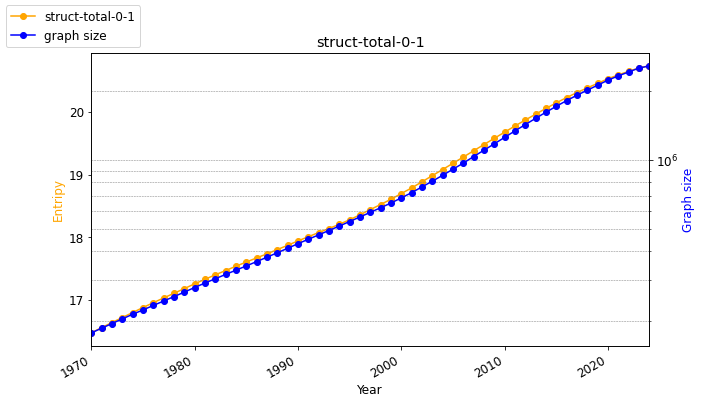

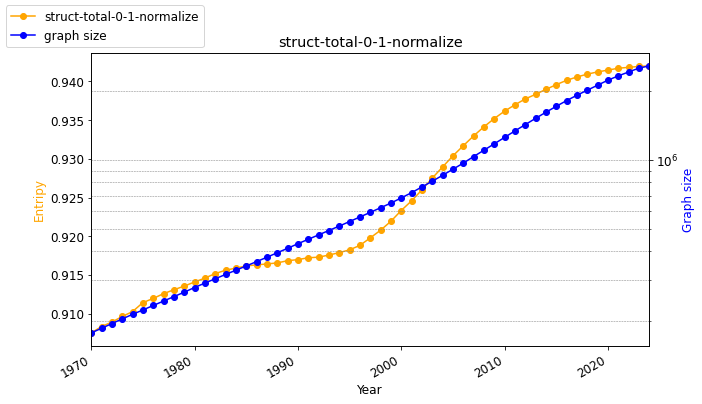

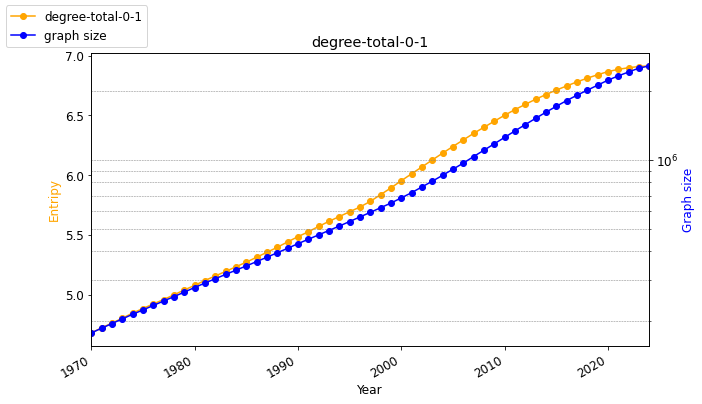

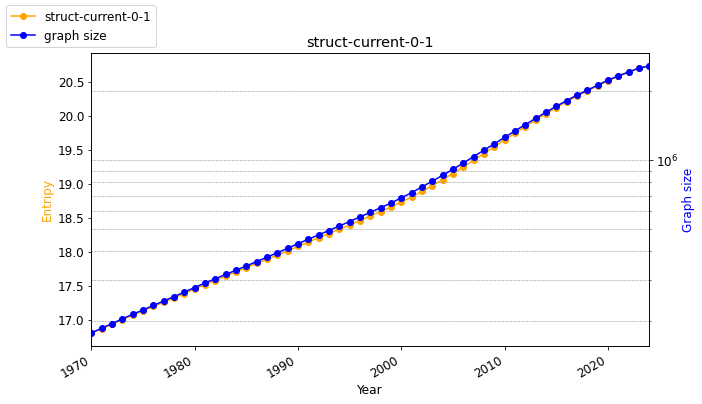

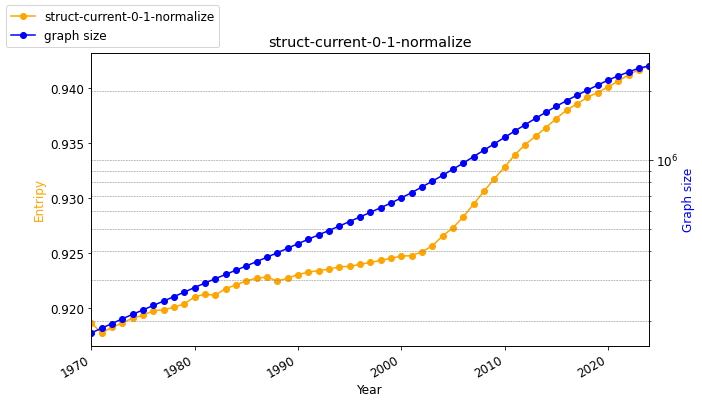

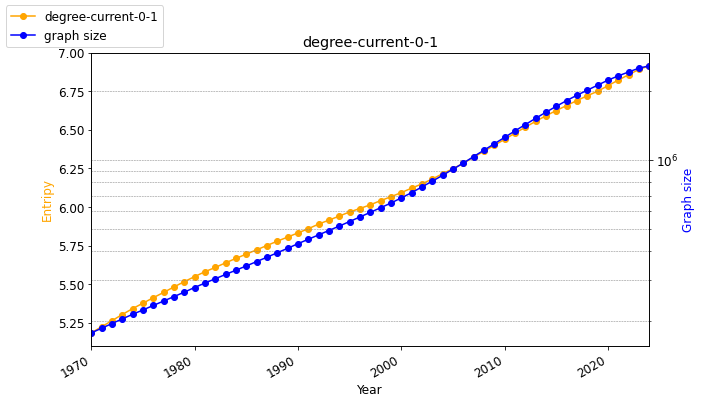

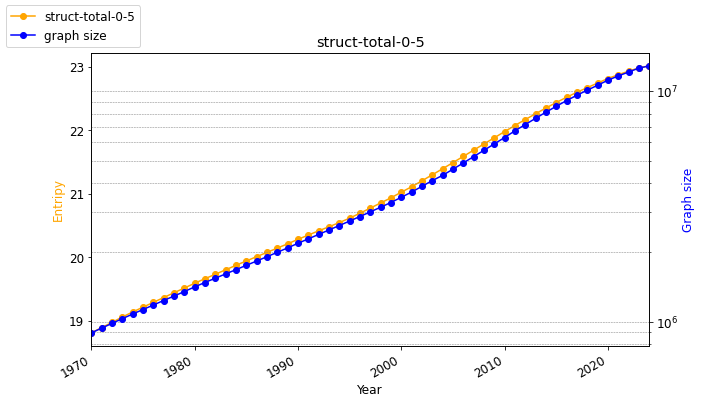

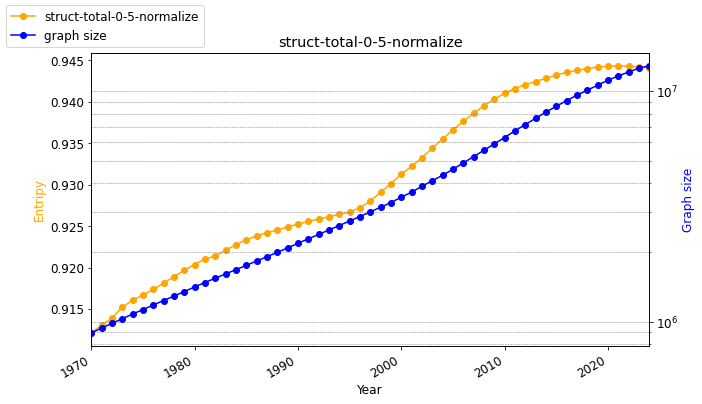

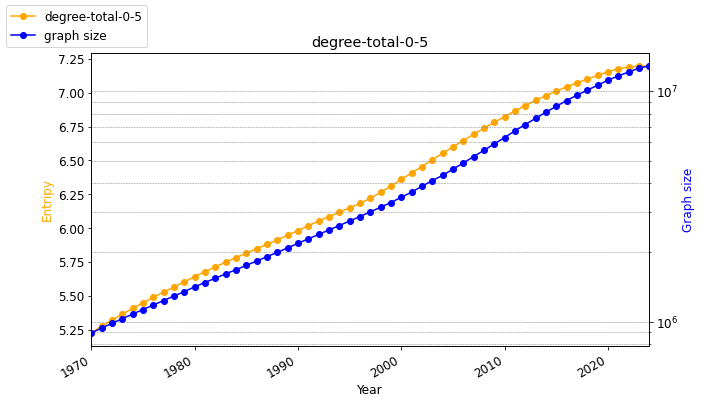

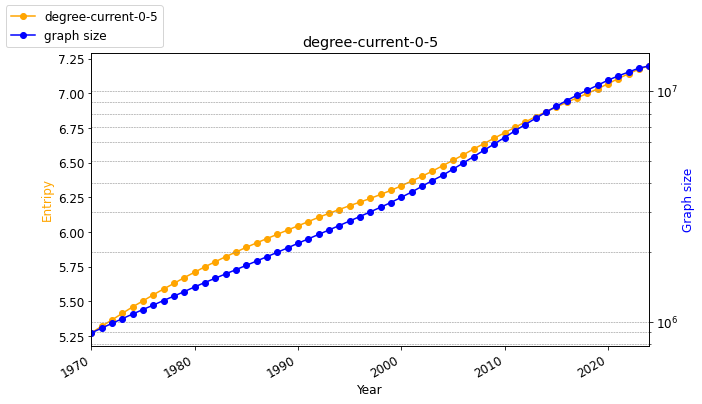

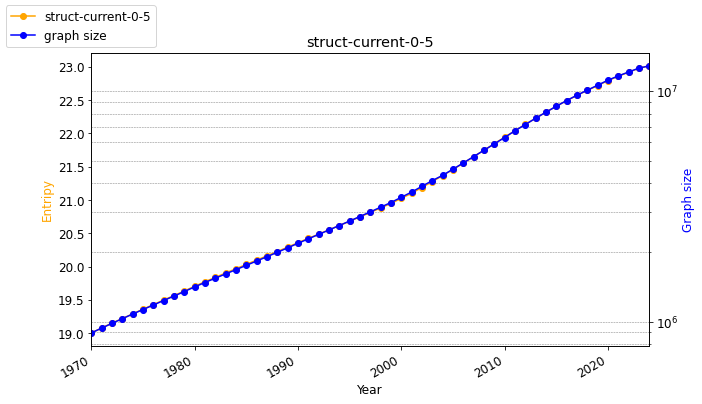

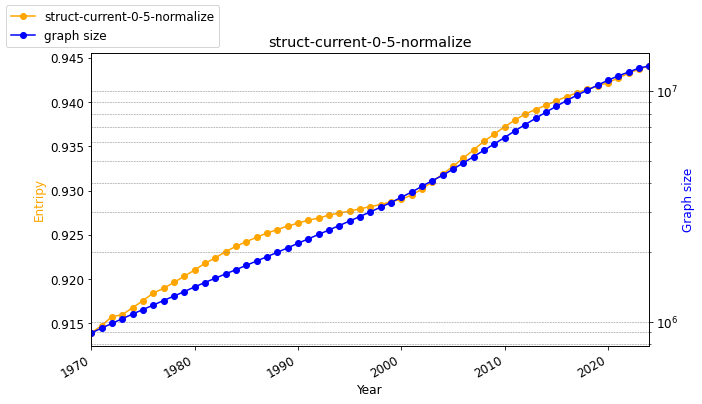

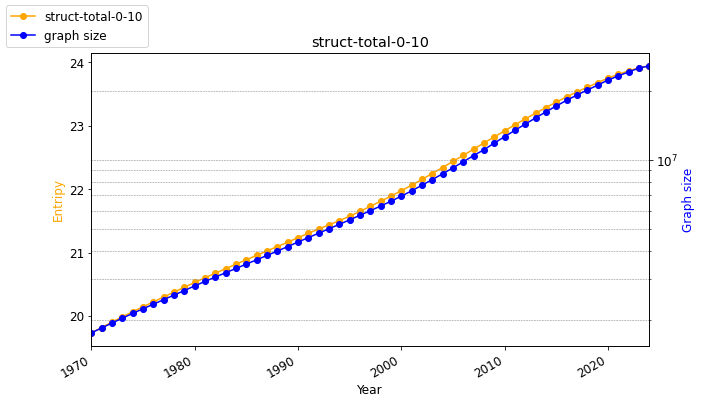

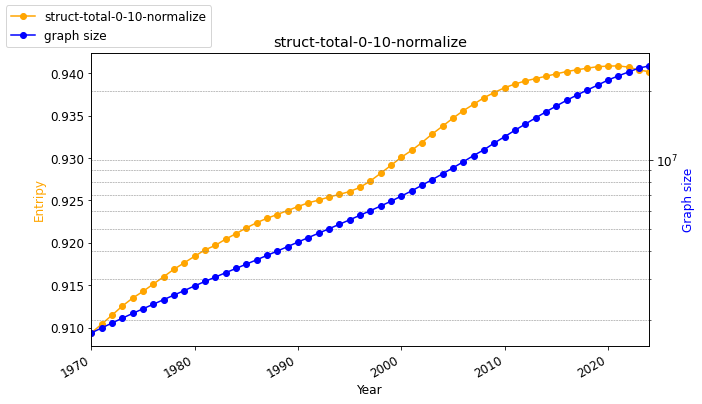

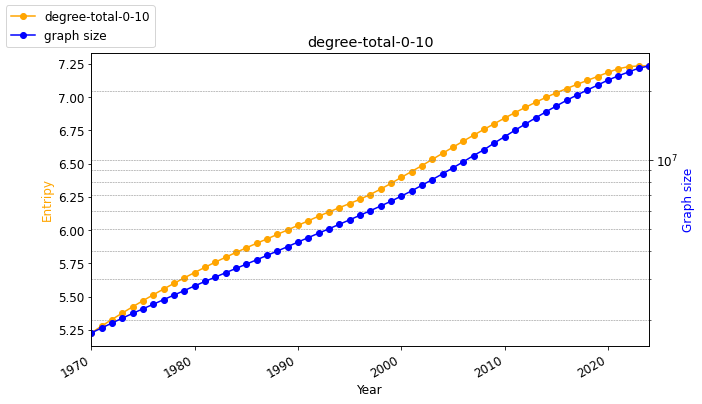

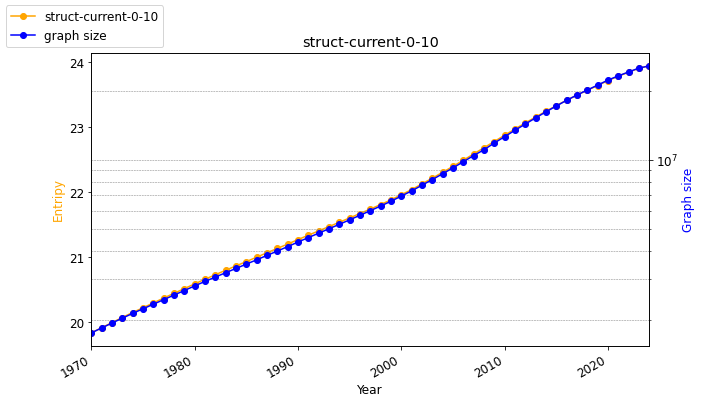

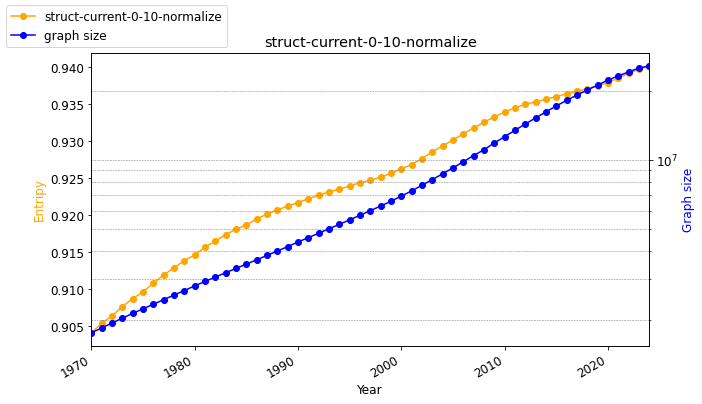

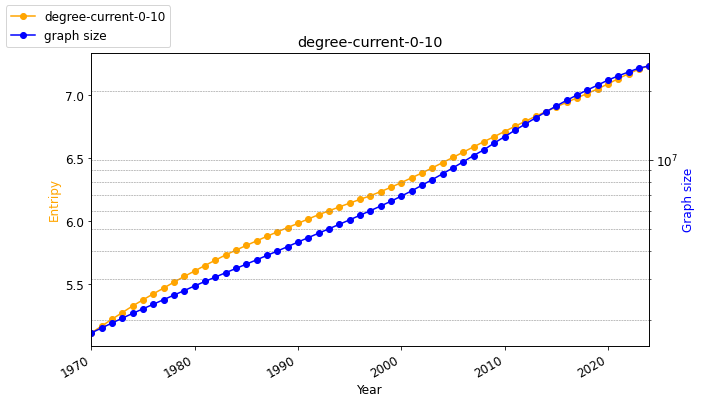

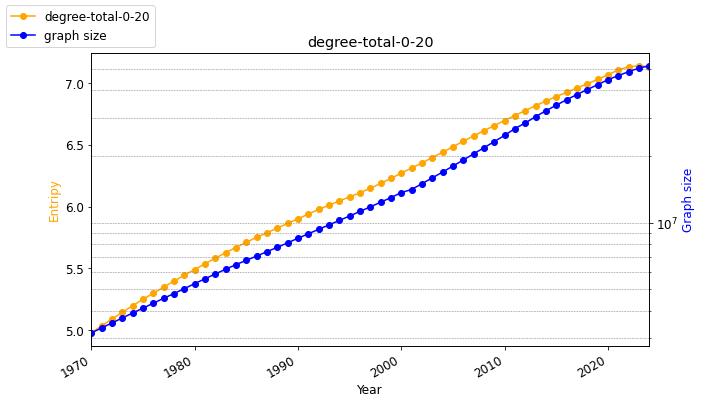

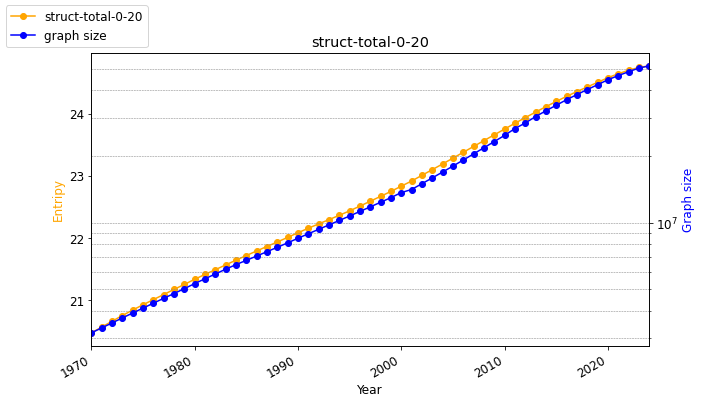

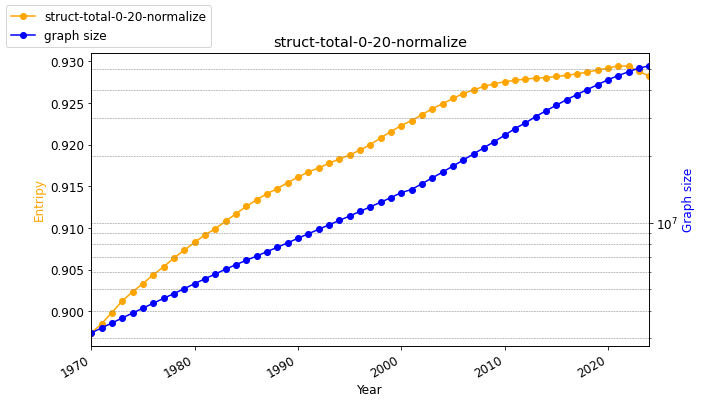

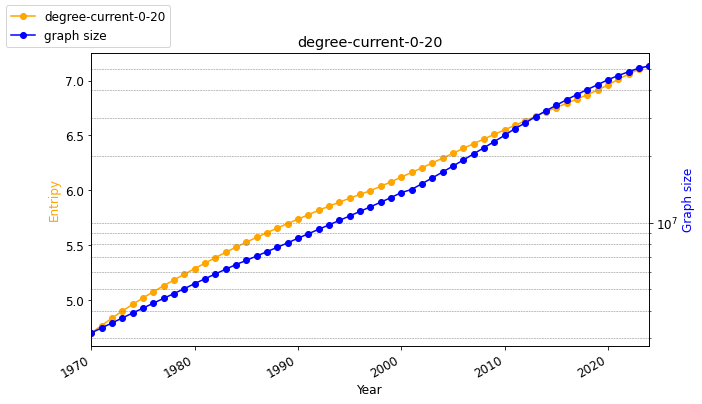

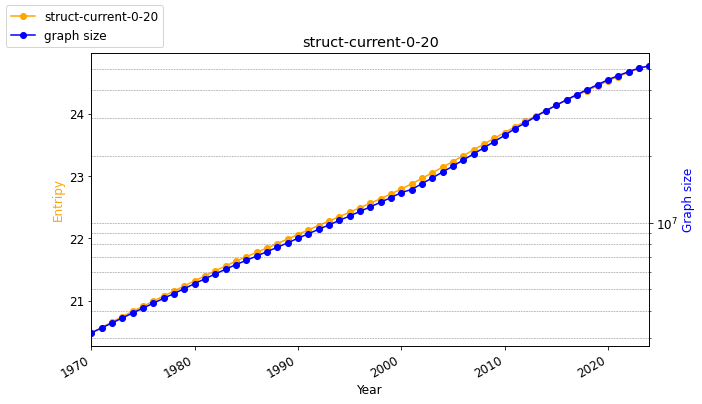

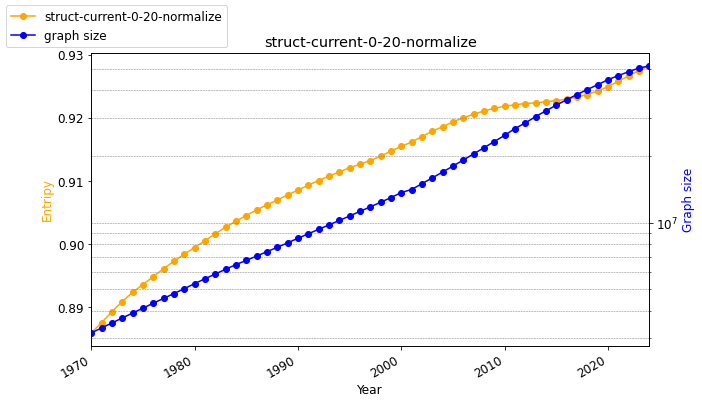

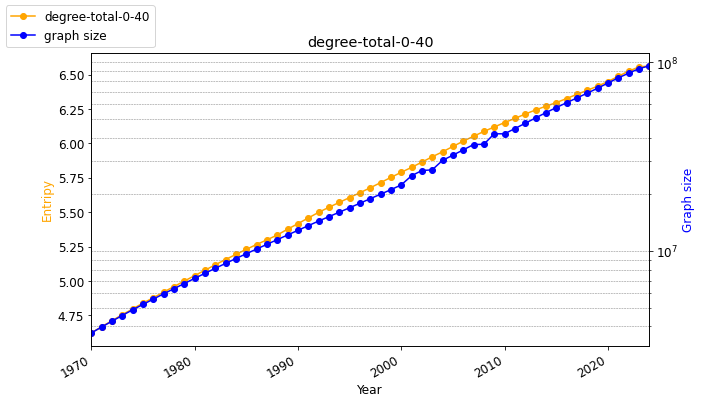

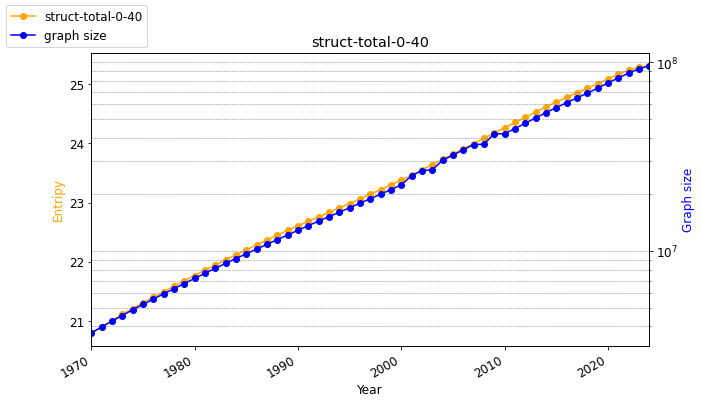

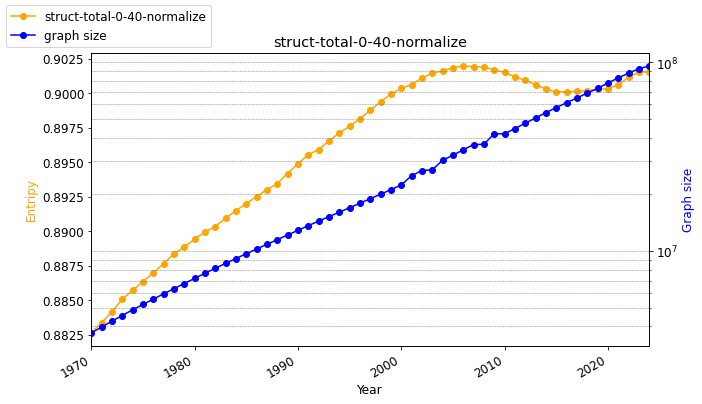

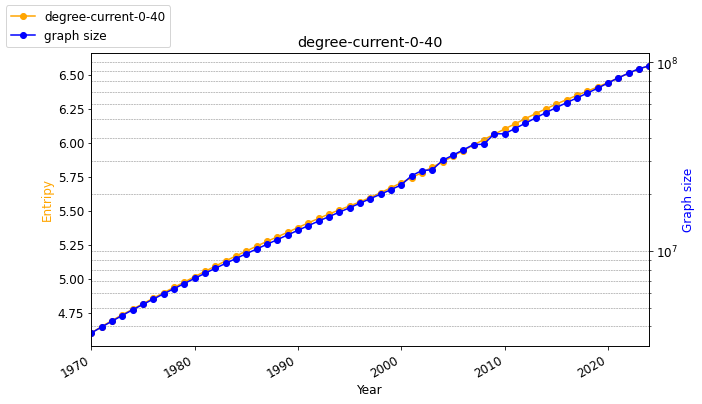

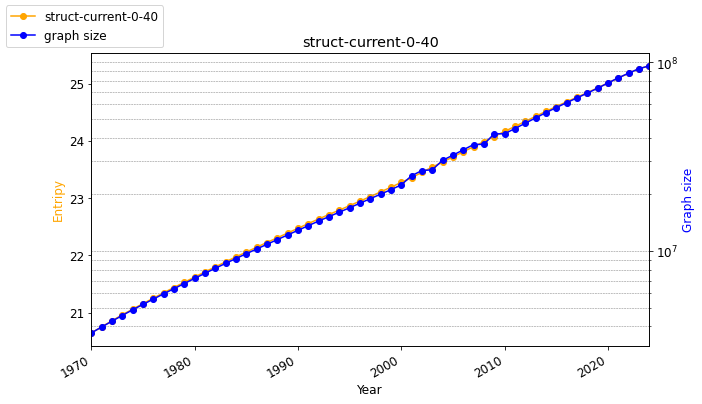

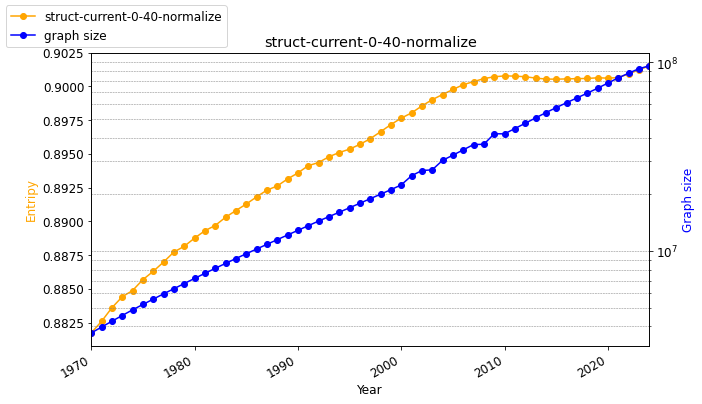

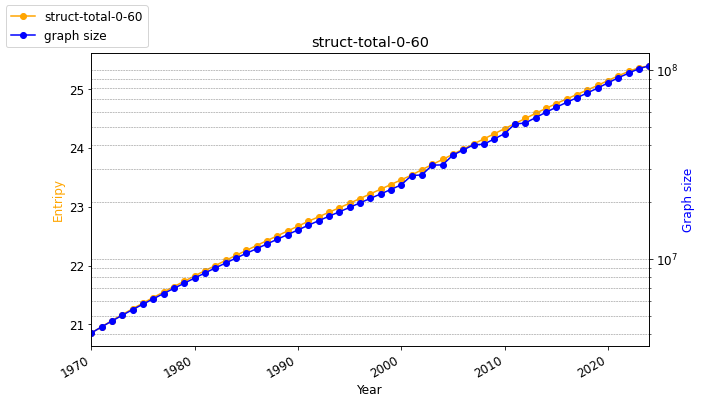

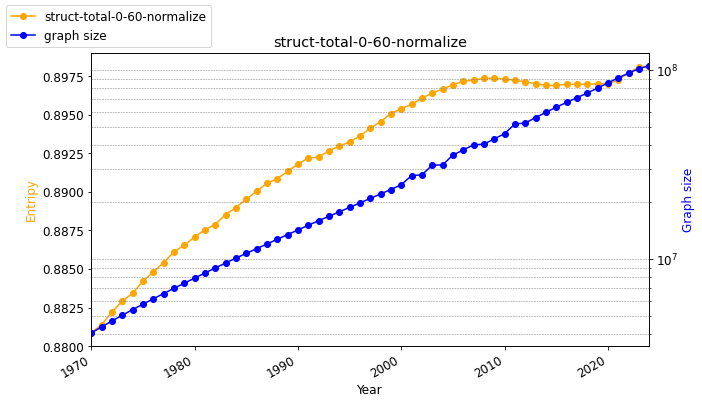

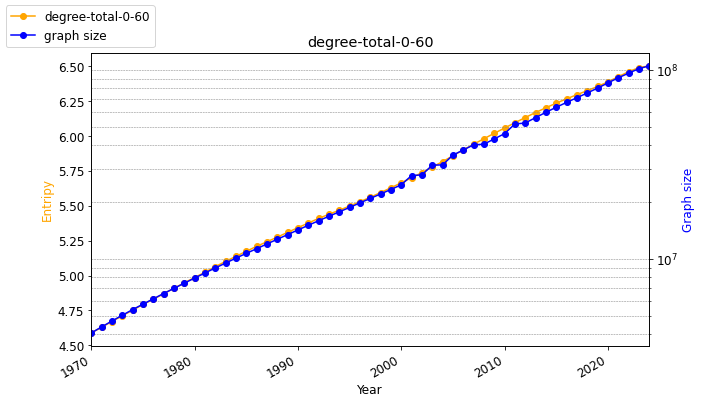

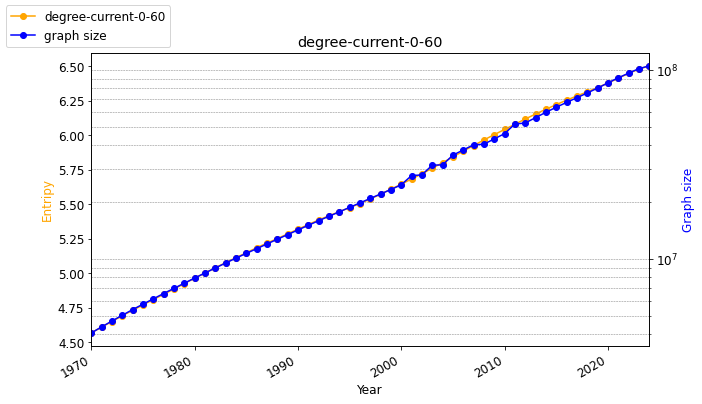

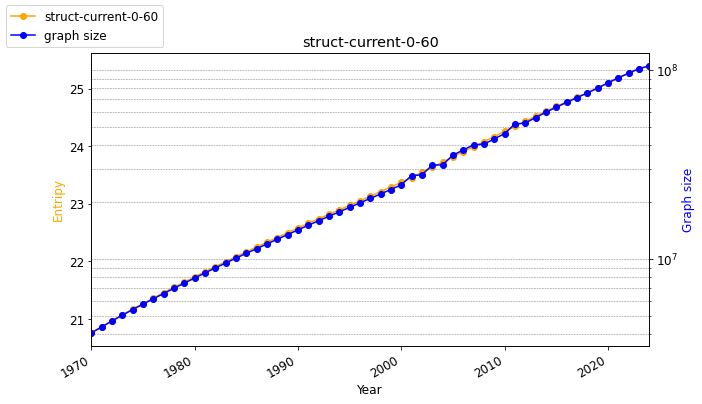

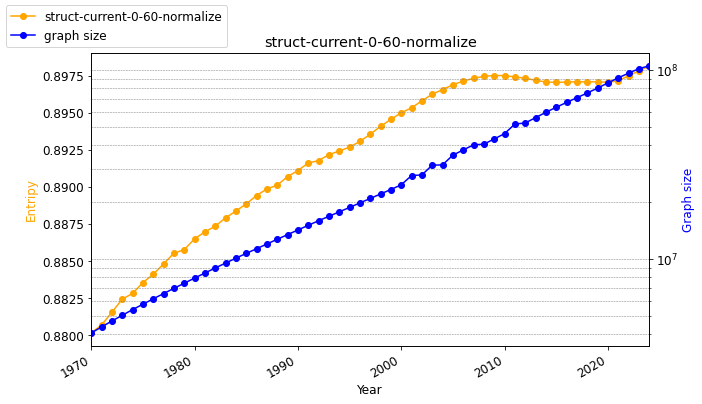

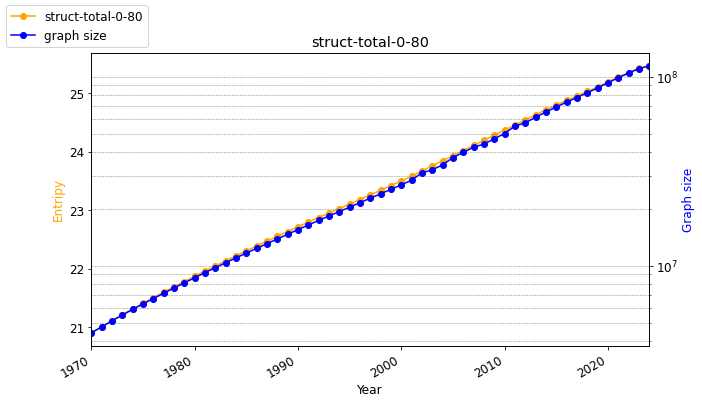

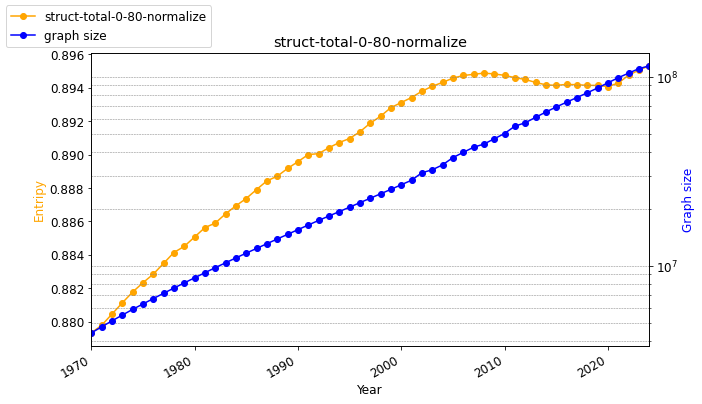

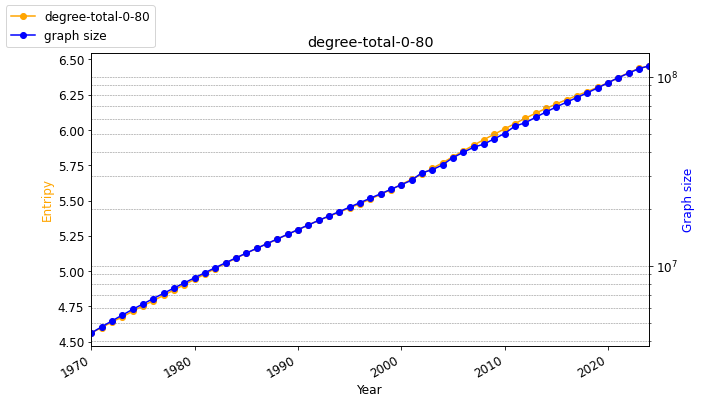

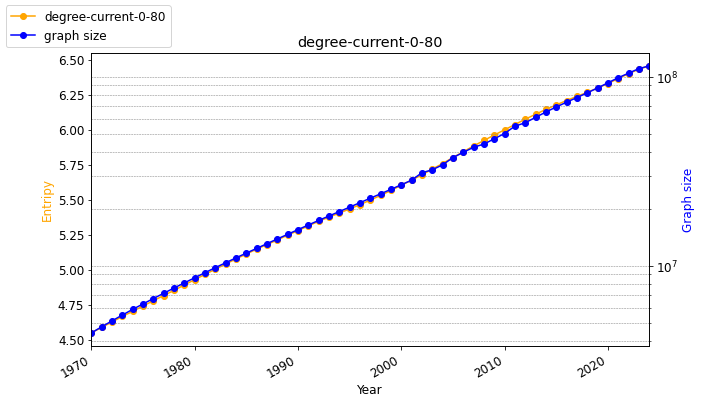

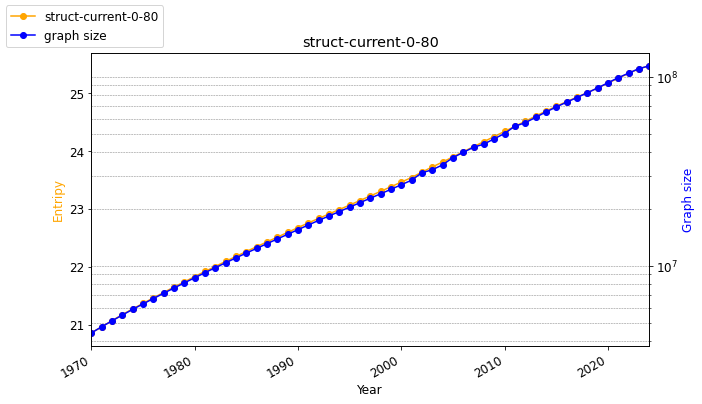

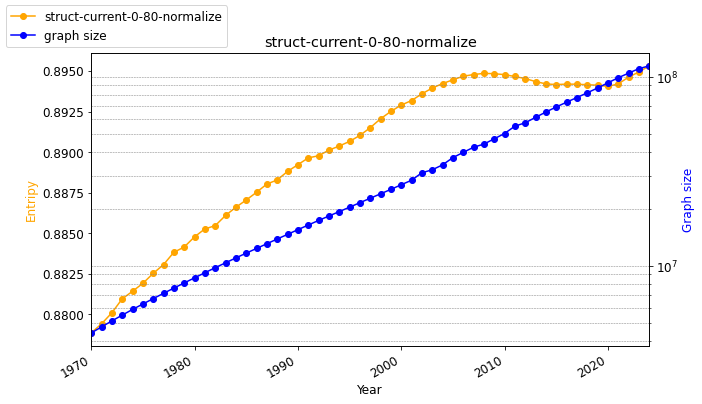

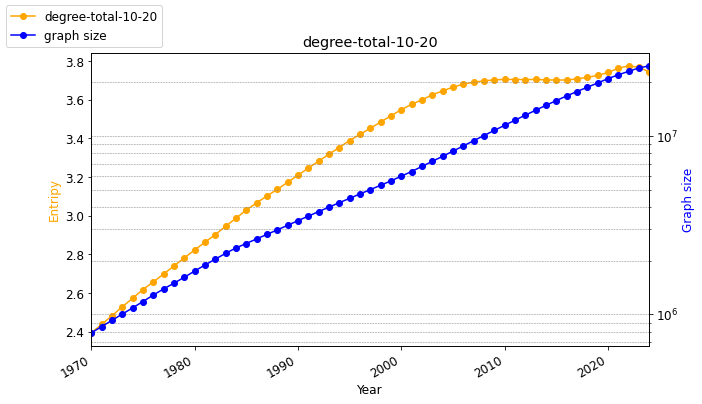

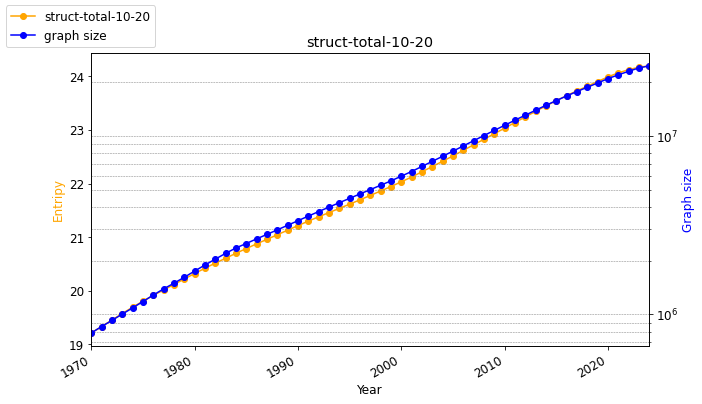

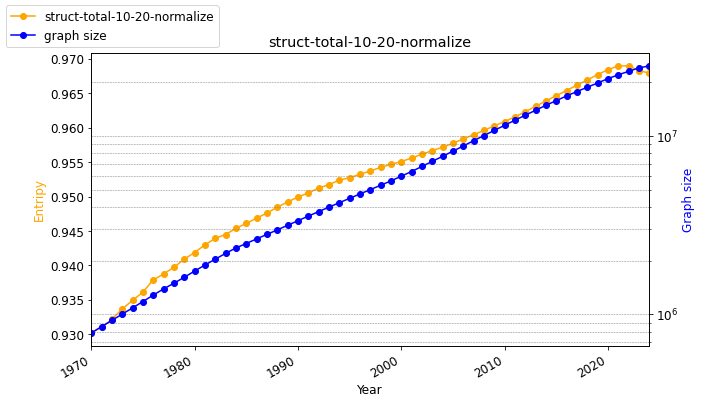

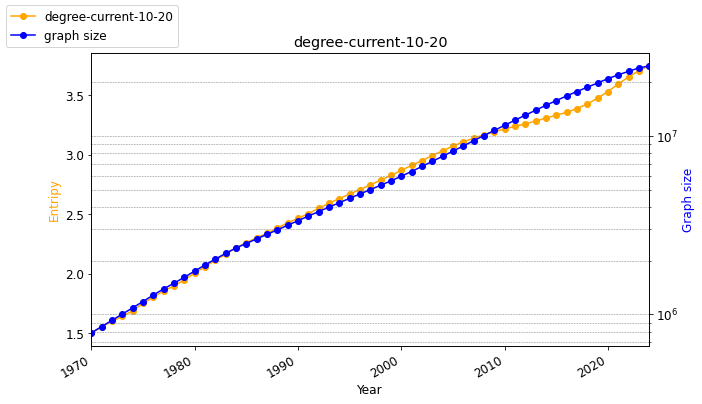

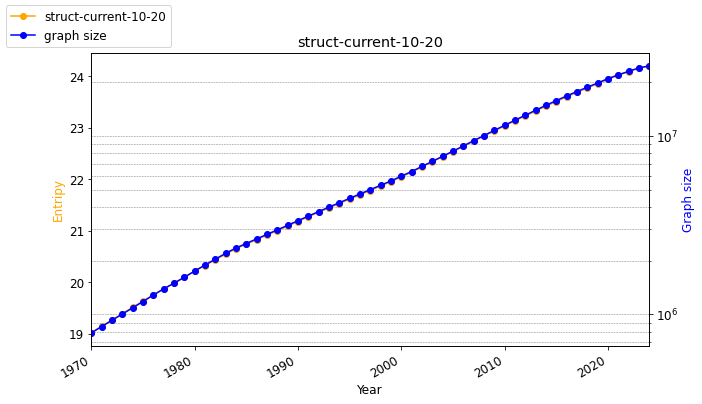

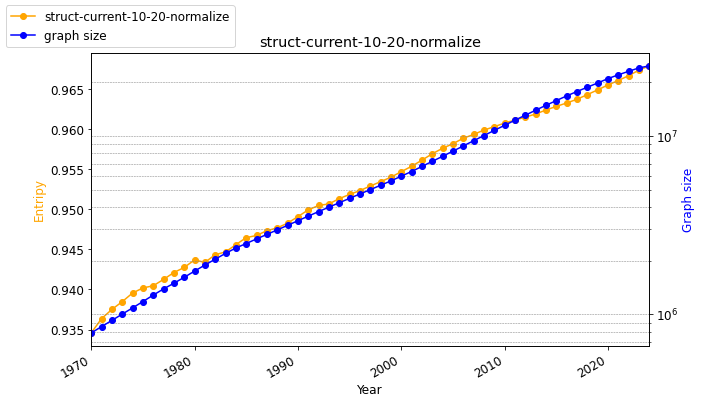

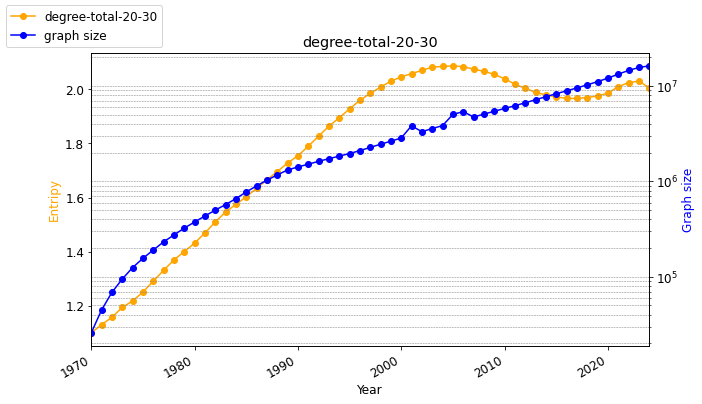

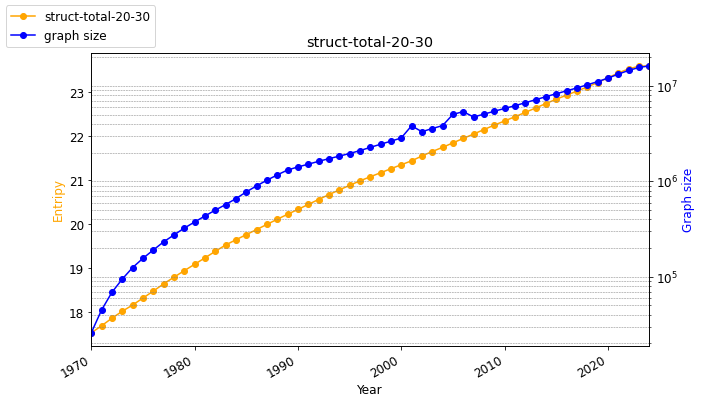

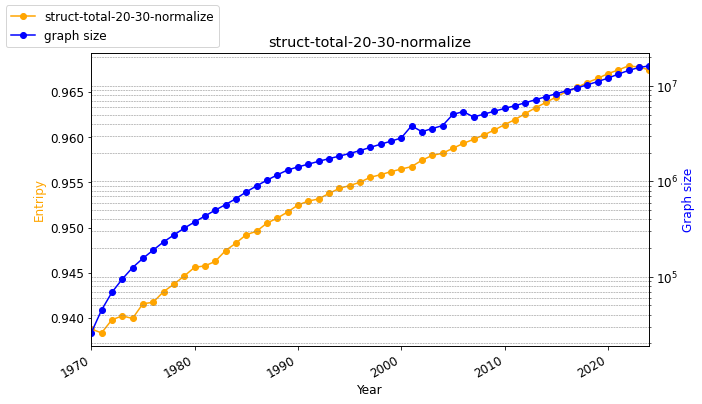

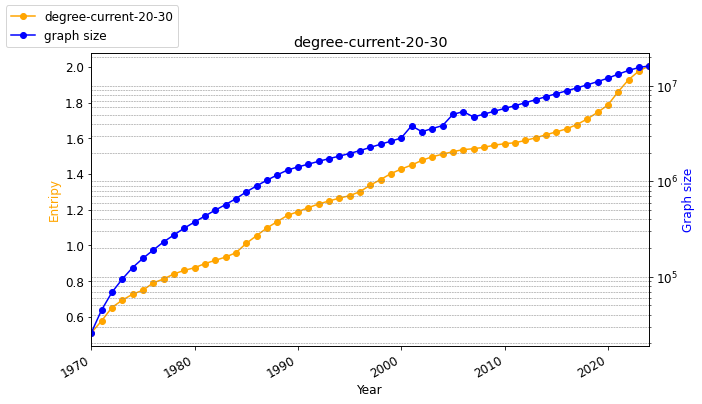

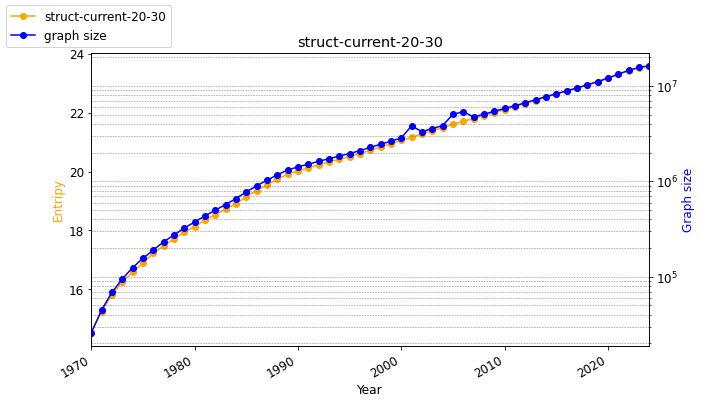

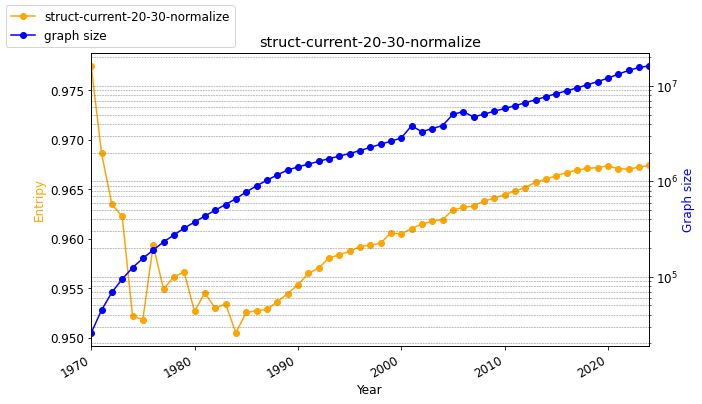

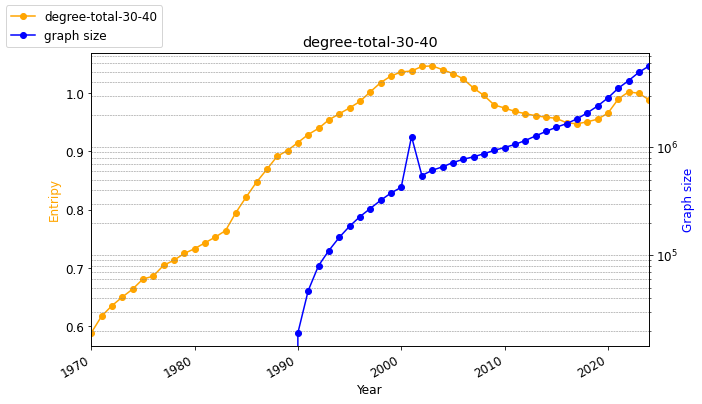

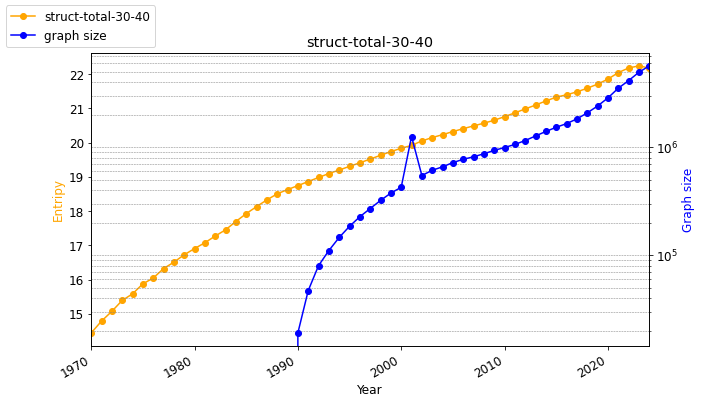

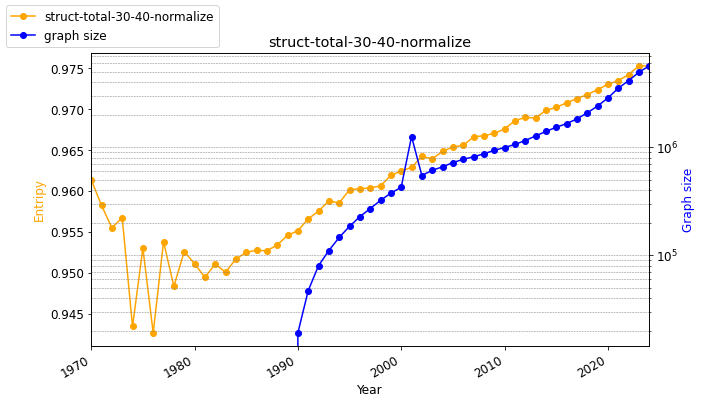

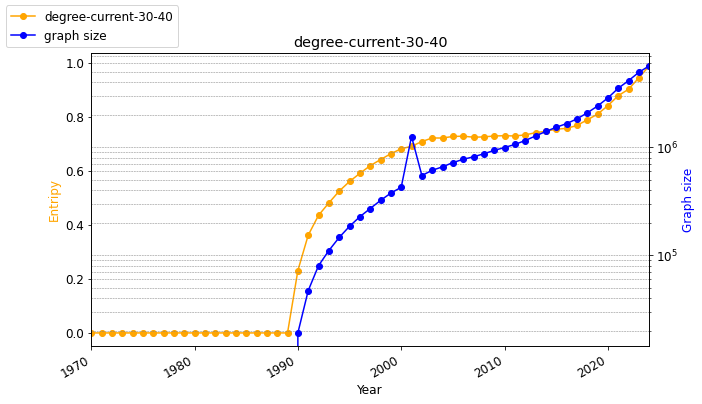

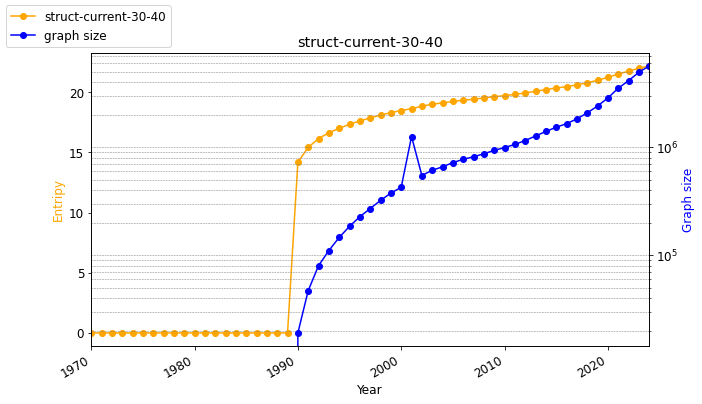

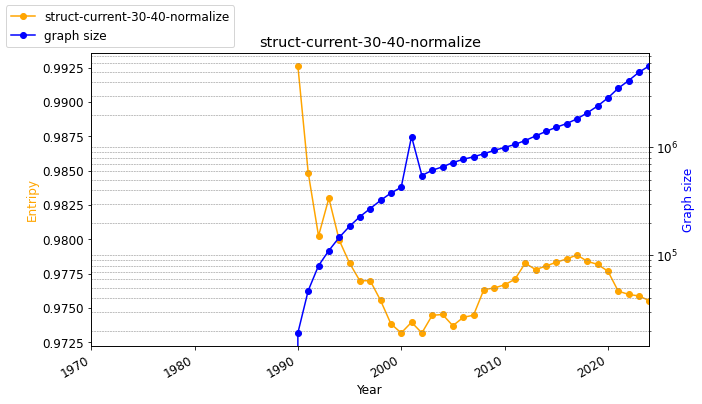

/tmp/ipykernel_597076/4243136426.py:27: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  ax2.set_yscale('log')


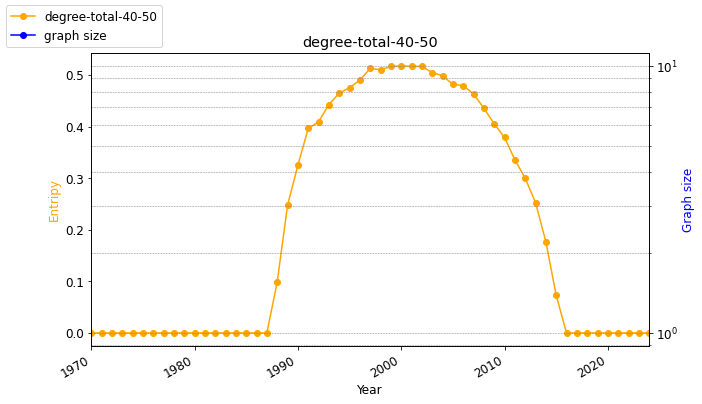

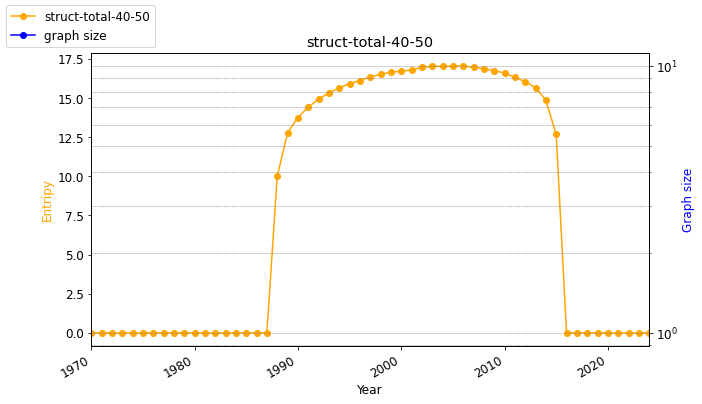

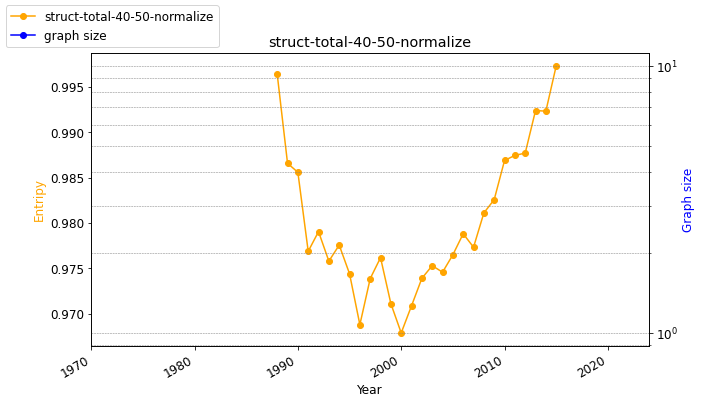

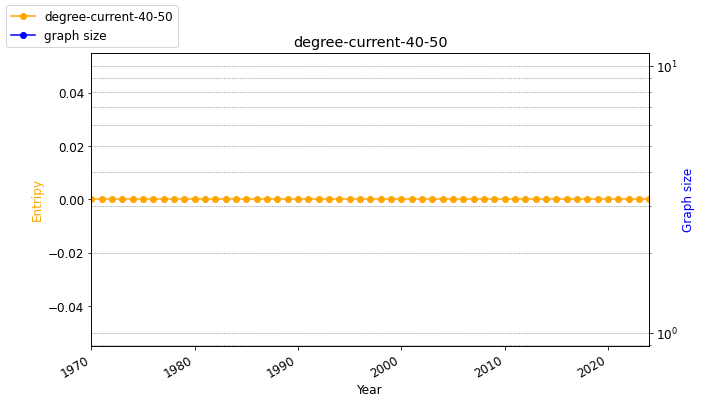

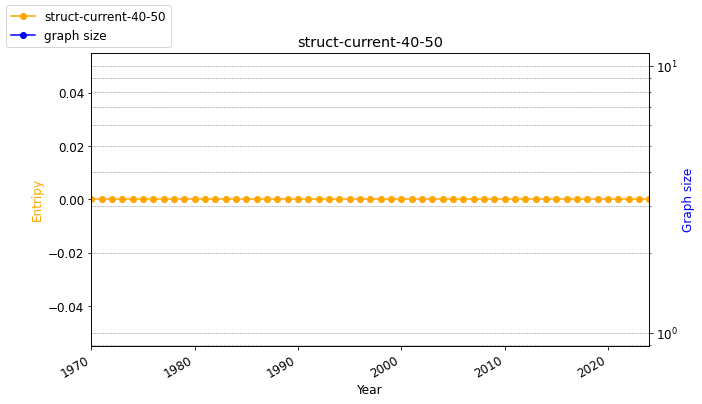

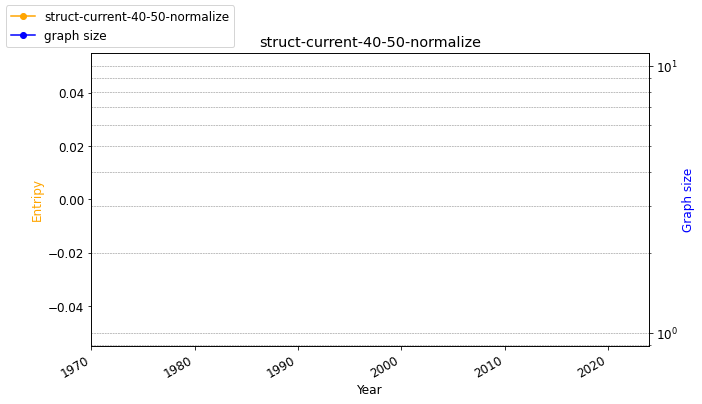

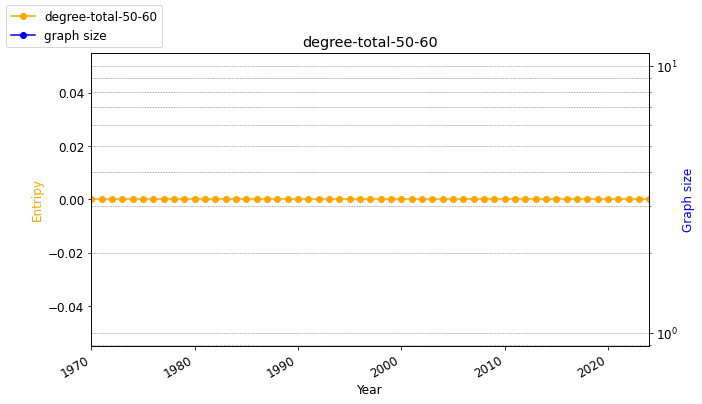

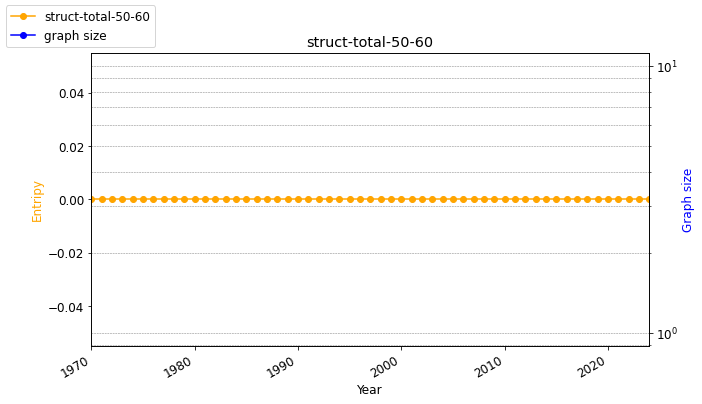

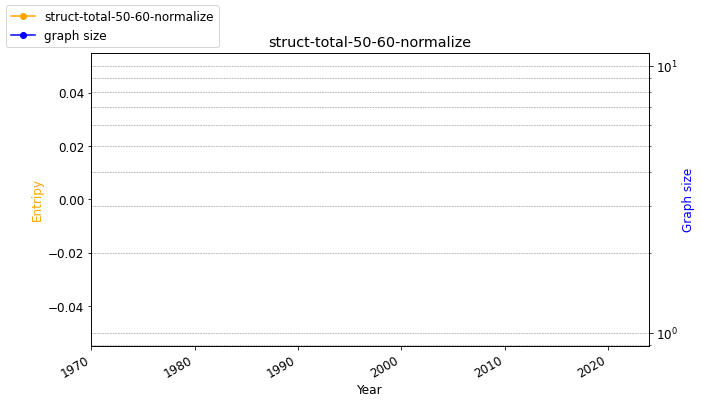

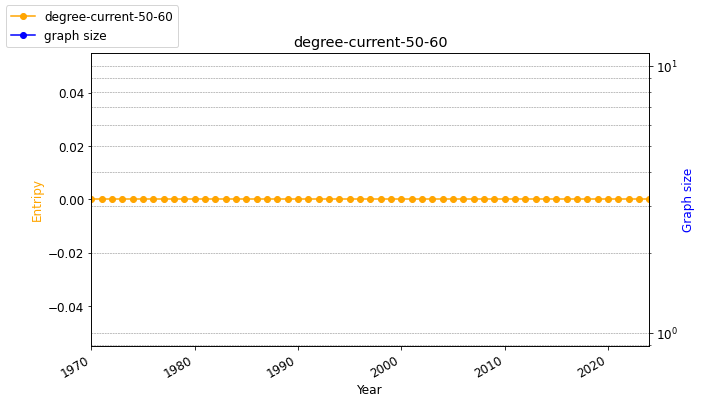

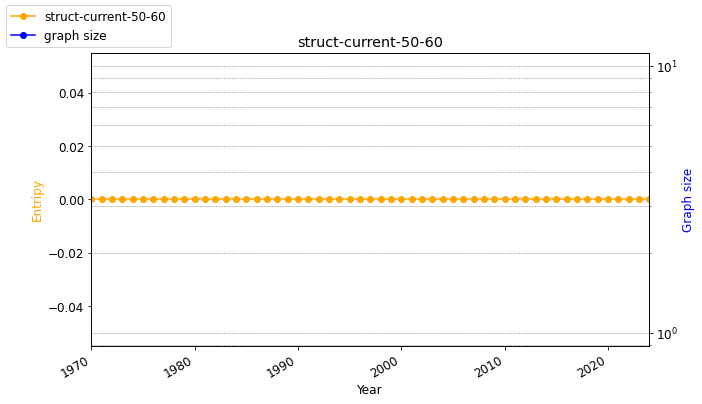

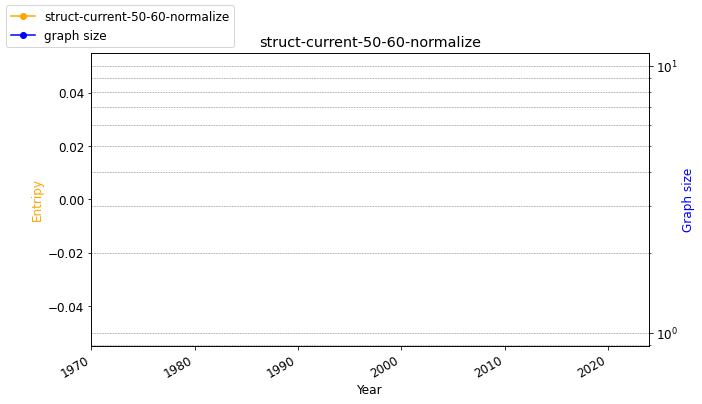

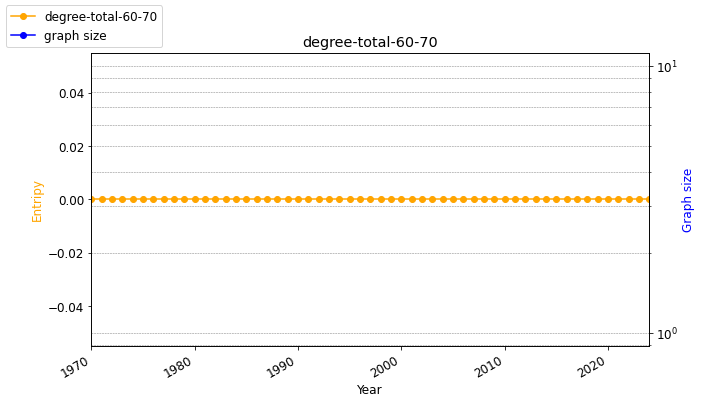

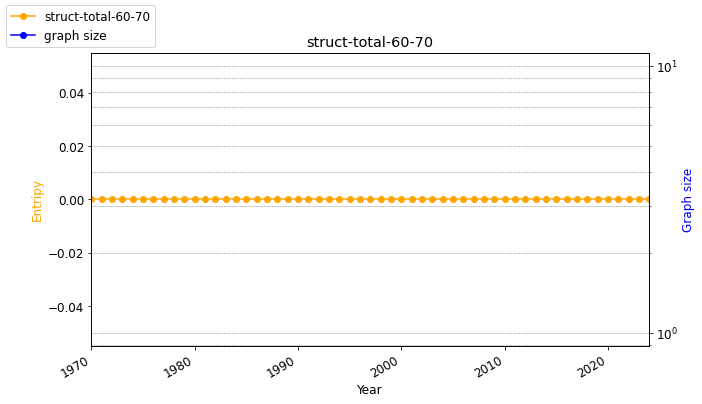

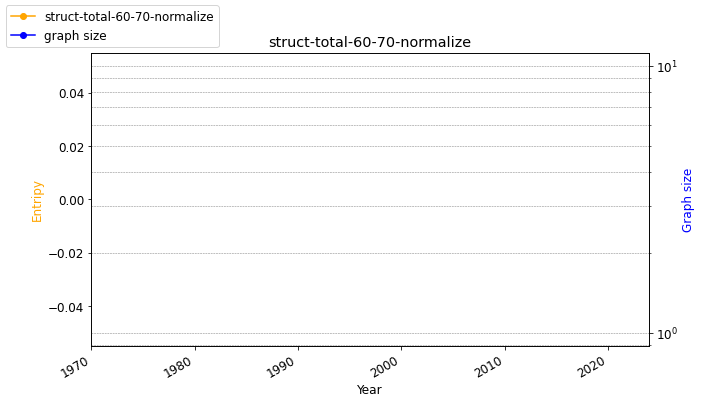

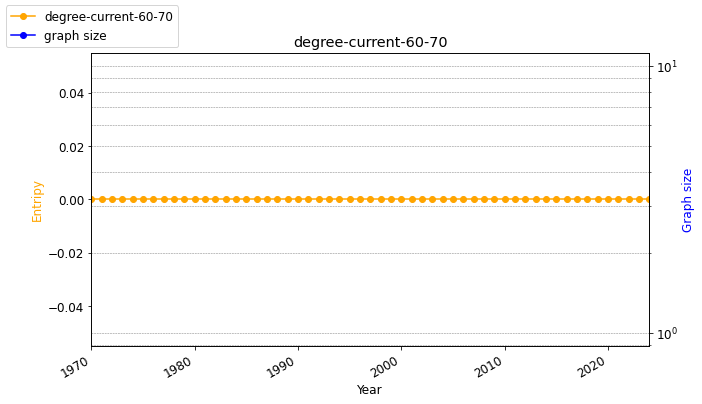

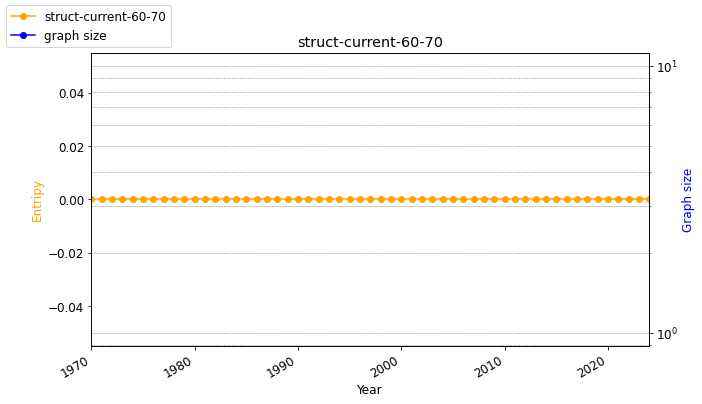

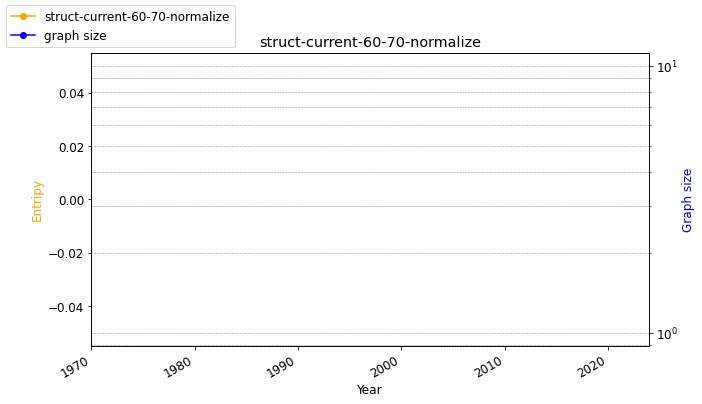

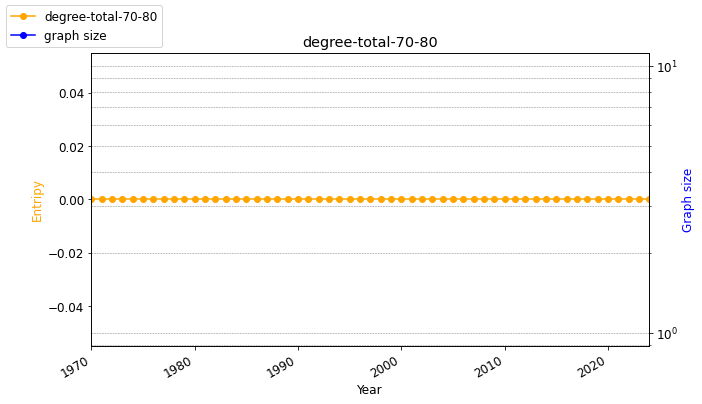

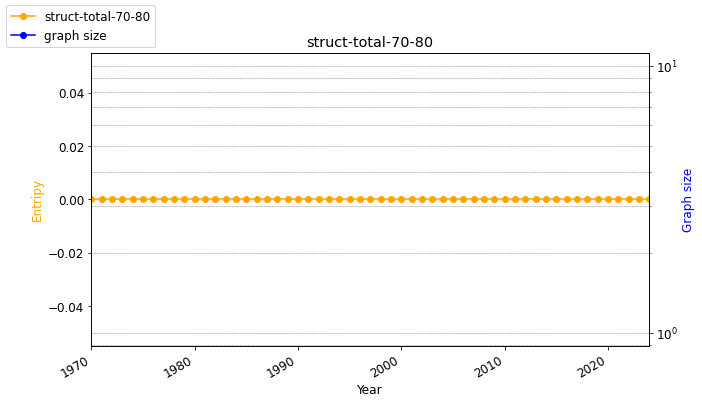

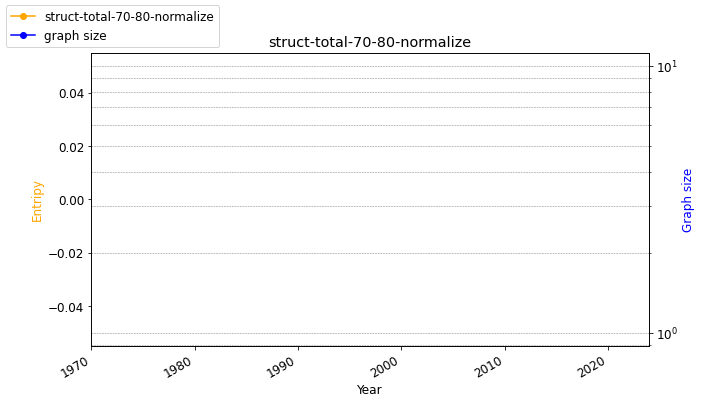

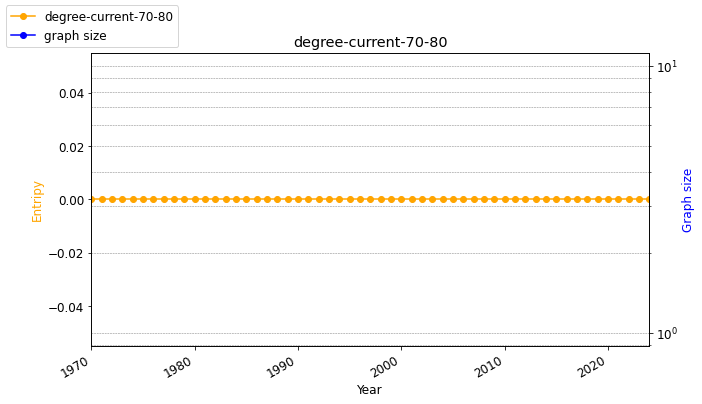

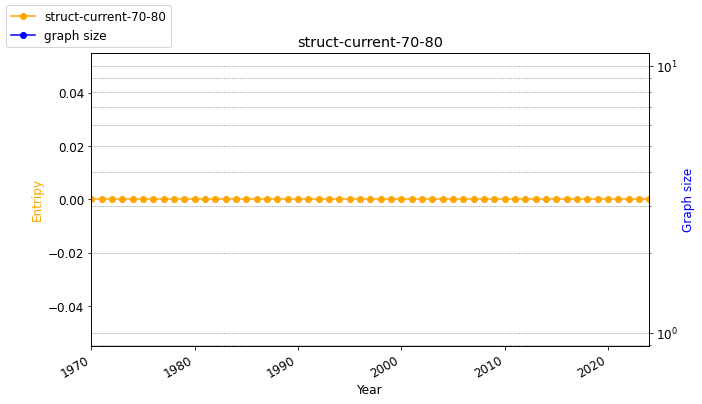

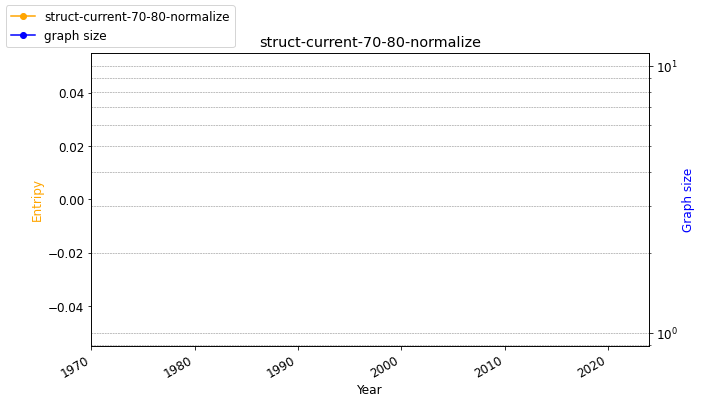

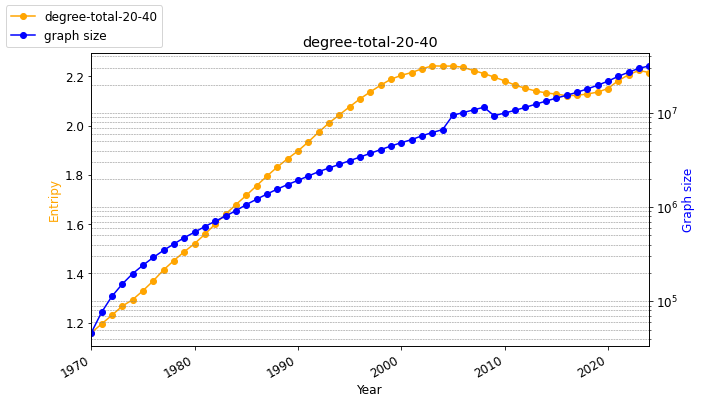

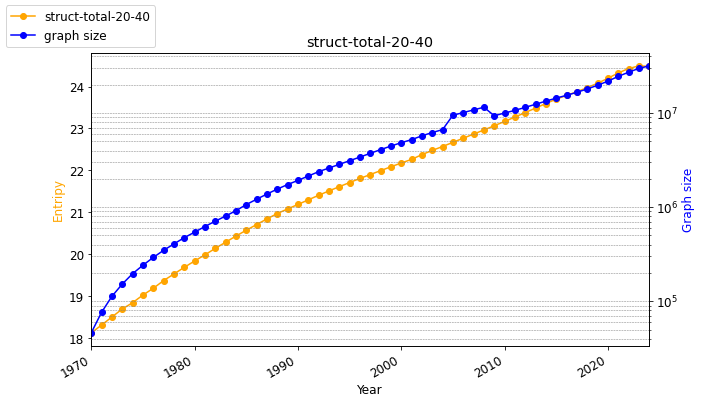

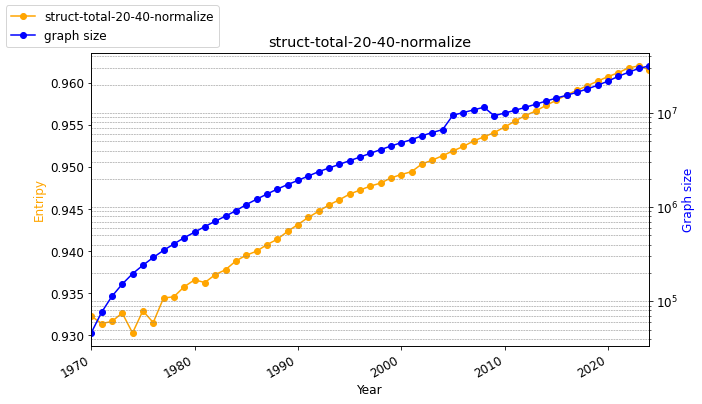

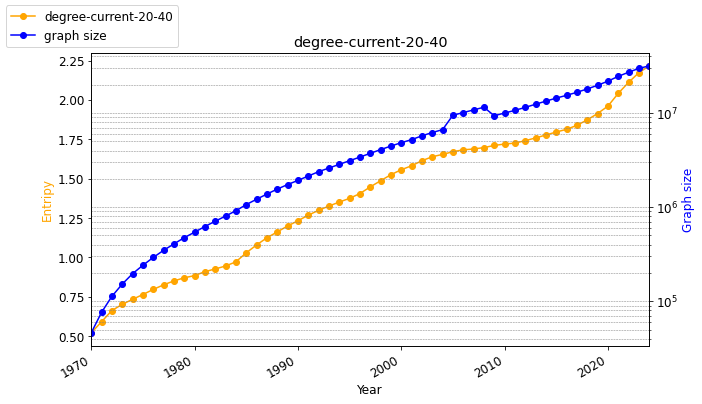

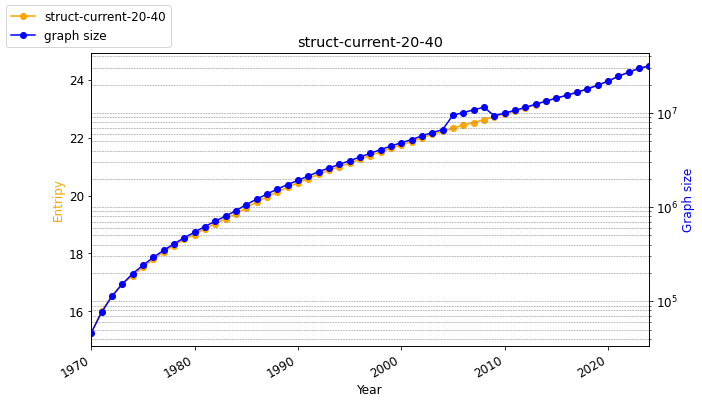

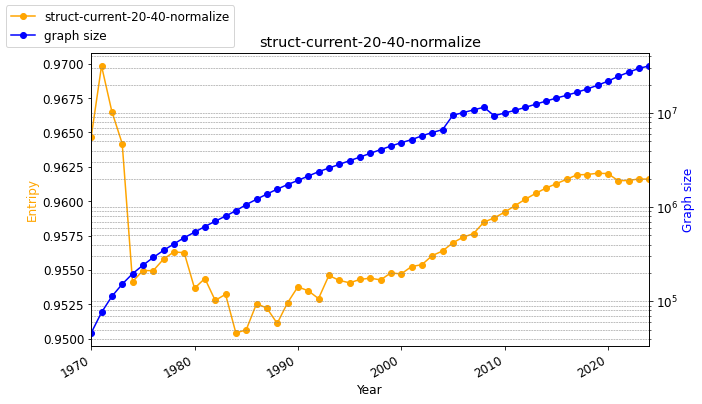

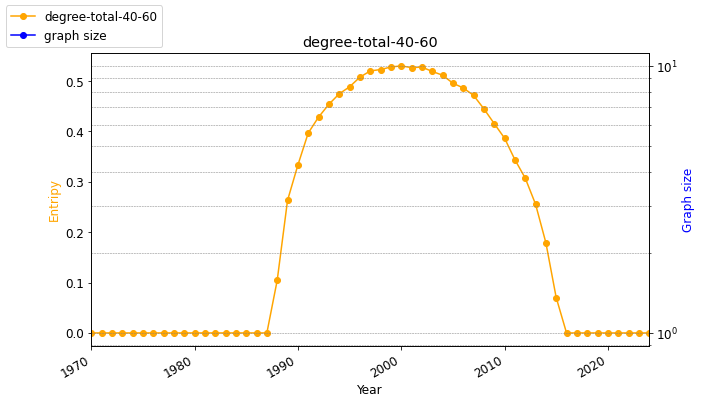

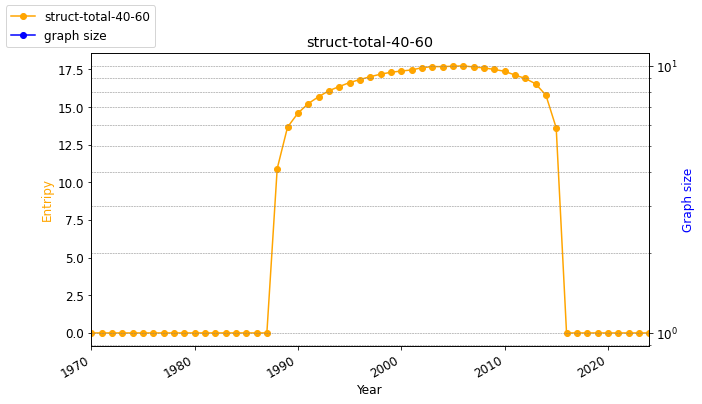

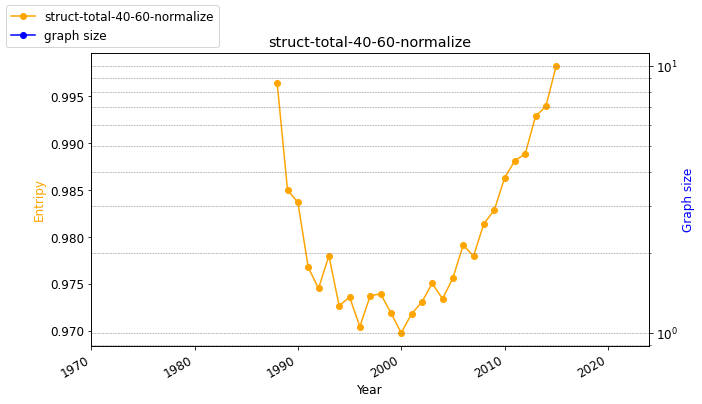

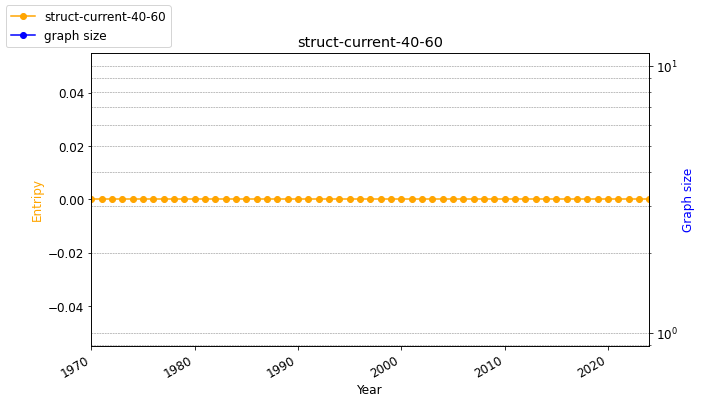

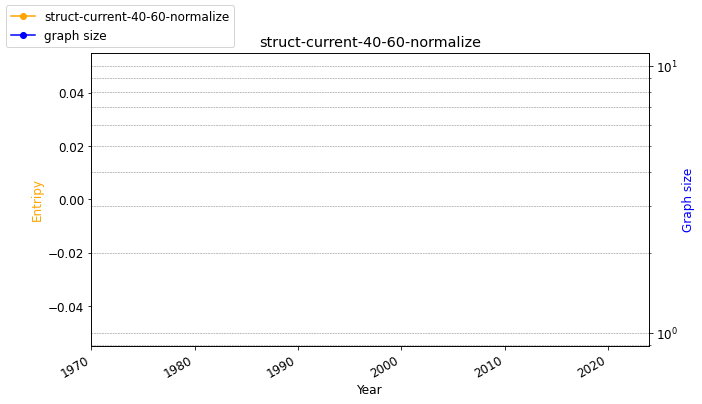

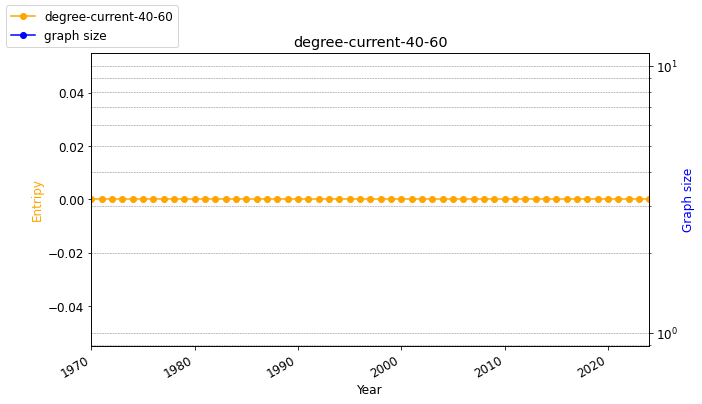

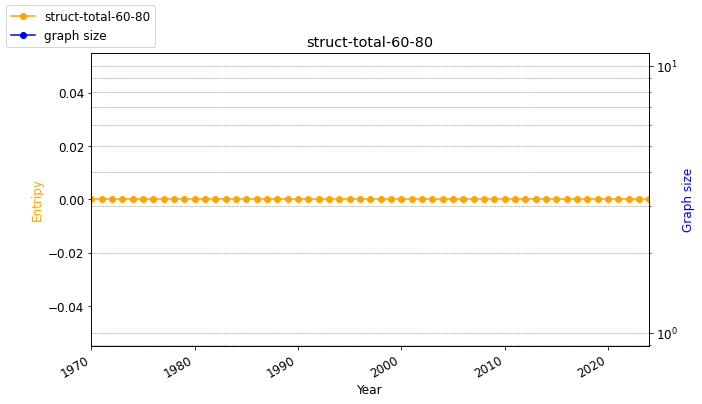

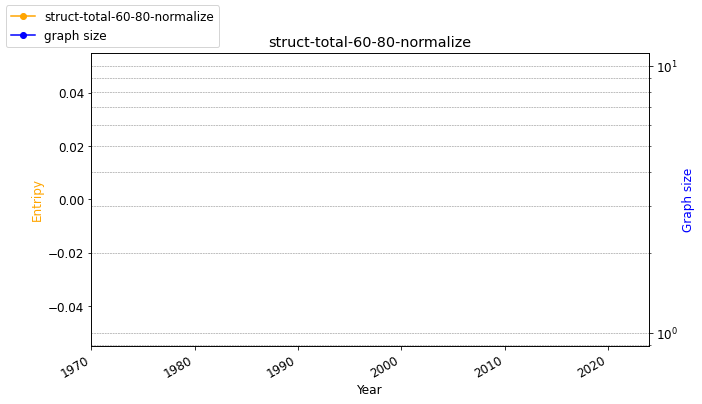

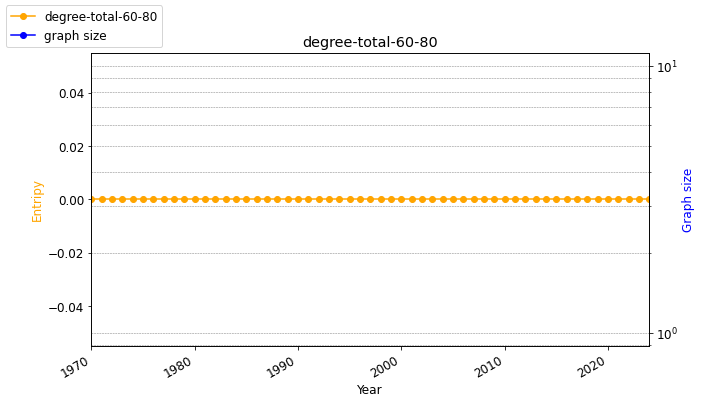

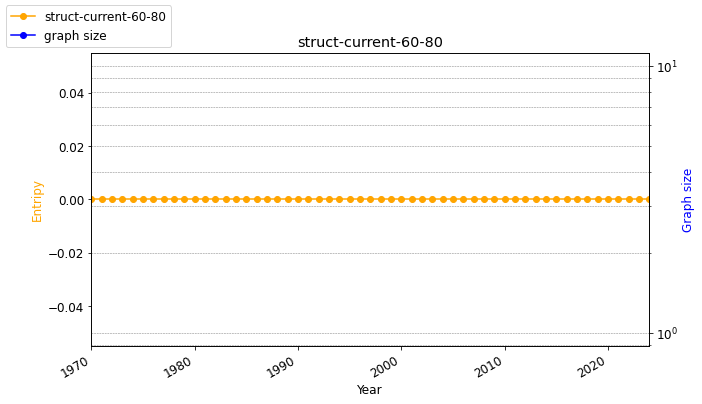

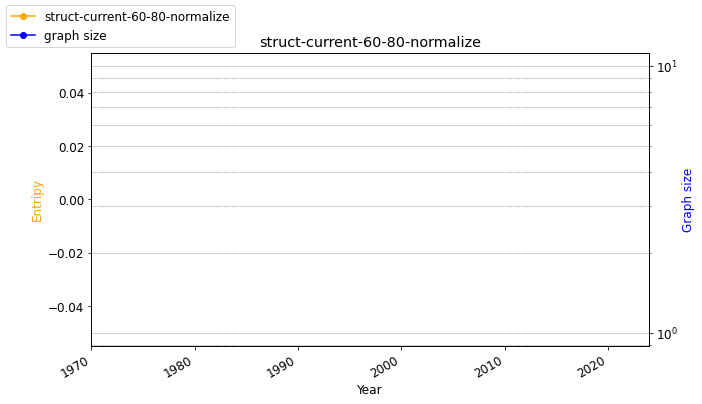

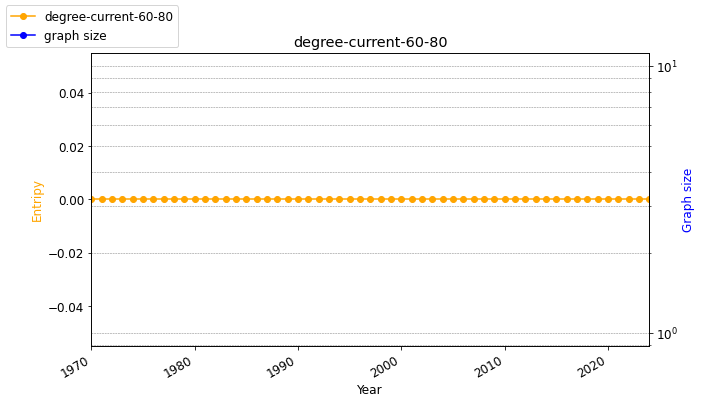

In [38]:


year_range = [year for year in range(start_year, end_year+1)]
node_size_key = 'graph-size'

plt.rcParams['font.size'] = 12

for k,data in entropy_data_map.items():
    if k[0] == "size":
        continue
    
    percentStart, percentEnd = k[2],k[3]
    # plt.figure)
    
    fig, ax1 = plt.subplots(figsize=(10, 6))

    ax1.plot(year_range, data,'orange', label="-".join(k), marker="o")  # 第四条线

    ax1.set_xlim(start_year, end_year)
    # ax1.set_xticks(year_range)
    plt.title("-".join(k))
    ax1.set_xlabel('Year')
    ax1.set_ylabel('Entripy', color='orange')
    
    ax2 = ax1.twinx()
    key = ('size', percentStart, percentEnd)
    ax2.plot(year_range, entropy_data_map[key], 'b-', label="graph size", marker="o")  # 'b-' 表示蓝色实线
    ax2.set_ylabel('Graph size', color='b')
    ax2.set_yscale('log')

    # 获取两个轴的图例句柄和标签
    handles1, labels1 = ax1.get_legend_handles_labels()
    handles2, labels2 = ax2.get_legend_handles_labels()

    # 合并图例句柄和标签
    handles = handles1 + handles2
    labels = labels1 + labels2

    # 使用fig.legend()统一添加图例
    fig.legend(handles, labels, loc='upper left')

    plt.grid(True,axis='both' , which='both', linestyle='--', linewidth=0.5, color='gray')
    # plt.grid(True)
    # 显示图表
    plt.gcf().autofmt_xdate()  # 自动旋转和调整日期标签
    # 添加标题和轴标签
    plt.show()
    

# wikipedia

```

{
	"_id" : ObjectId("674552a3418a12690f02a82d"),
	"year" : 2001,
	"graphSize" : 15247,
	"entropyType" : "degress",
	"entropy" : {
		"entropyin" : 4.3626798794385735,
		"entropyout" : 4.371615121061256,
		"entropy" : 4.975903361955588
	}
},

/* 2 createdAt:11/26/2024, 12:46:27 PM*/
{
	"_id" : ObjectId("674552a3418a12690f02a82e"),
	"year" : 2001,
	"graphSize" : 15247,
	"entropyType" : "struct",
	"entropy" : {
		"entropyin" : 12.03759740627351,
		"entropyout" : 12.961920549262317,
		"entropy" : 12.80002896422066,
		"normalizeentropyin" : 0.8662486632807623,
		"normalizeentropyout" : 0.9327647345556029,
		"normalizeentropy" : 0.8157064238903782
	}
},
```

In [1]:
database_name = f"wikipedia_dump_v{env_config['WIKI_VERSION']}"
wikipedia_entropy_collection = pymongo.MongoClient(env_config['Mongo_Url'])[database_name]["entropy_v0"]
wikipedia_entropy_collection.count_documents({})

NameError: name 'env_config' is not defined

In [161]:
import collections 
start_year, end_year = 2002,2024
entropy_data_map = collections.defaultdict(lambda: [np.nan] * (end_year - start_year + 1) )
for doc in wikipedia_entropy_collection.find():
    index = doc['year'] - start_year
    if index < 0:
        continue
    if "struct" == doc['entropyType']:
        key = f"struct-entropy"
        entropy_data_map[key][index] = doc['entropy']['entropy']
        key = f"struct-entropy-normalize"
        entropy_data_map[key][index] = doc['entropy']['normalizeentropy']
    elif  "degress" == doc['entropyType']:
        key = f"degree-entropy"
        entropy_data_map[key][index] = doc['entropy']['entropy']
        
    key = "graph-size"
    entropy_data_map[key][index] = doc['graphSize']
len(entropy_data_map)

4

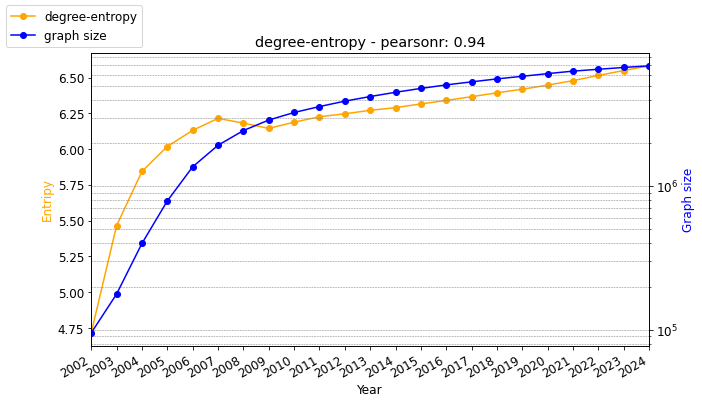

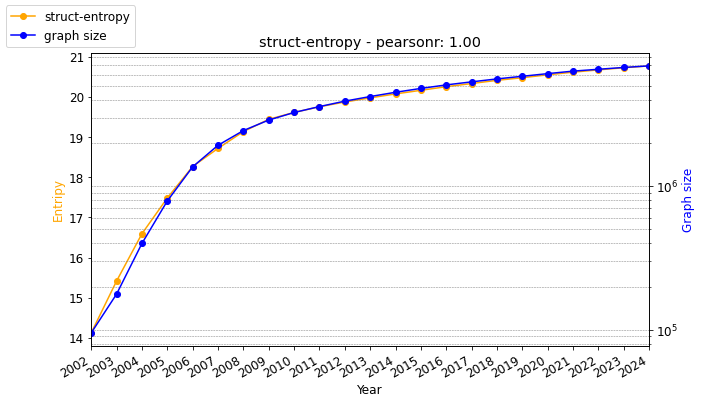

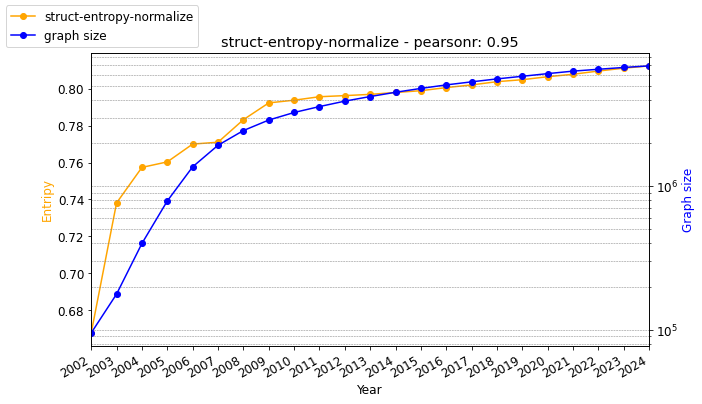

In [167]:

year_range = [year for year in range(start_year, end_year+1)]
node_size_key = 'graph-size'

plt.rcParams['font.size'] = 12

for k,data in entropy_data_map.items():
    if k == node_size_key:
        continue
    
    # plt.figure)
    
    fig, ax1 = plt.subplots(figsize=(10, 6))

    ax1.plot(year_range, data,'orange', label=k, marker='o')  # 第四条线

    ax1.set_xlim(start_year, end_year)
    ax1.set_xticks(year_range)
    ax1.set_xlabel('Year')
    ax1.set_ylabel('Entripy', color='orange')
    
    ax2 = ax1.twinx()
    ax2.plot(year_range, entropy_data_map[node_size_key], 'b-', label="graph size", marker='o')  # 'b-' 表示蓝色实线
    ax2.set_ylabel('Graph size', color='b')
    ax2.set_yscale('log')
    
    corr_coef, _ = pearsonr(data, np.log(entropy_data_map[node_size_key]))
    plt.title(f'{k} - pearsonr: {corr_coef:.2f}')
    # plt.title()

    # 获取两个轴的图例句柄和标签
    handles1, labels1 = ax1.get_legend_handles_labels()
    handles2, labels2 = ax2.get_legend_handles_labels()

    # 合并图例句柄和标签
    handles = handles1 + handles2
    labels = labels1 + labels2

    # 使用fig.legend()统一添加图例
    fig.legend(handles, labels, loc='upper left')

    plt.grid(True,axis='both' , which='both', linestyle='--', linewidth=0.5, color='gray')
    # plt.grid(True)
    # 显示图表
    plt.gcf().autofmt_xdate()  # 自动旋转和调整日期标签
    # 添加标题和轴标签
    plt.show()

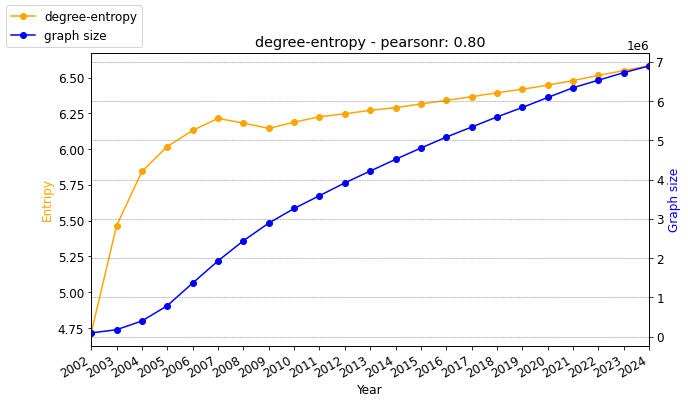

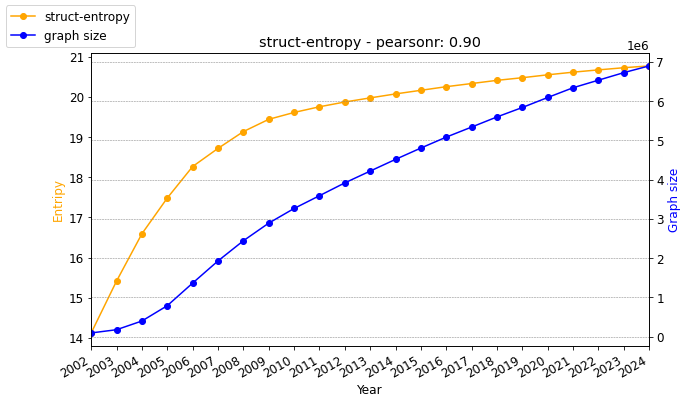

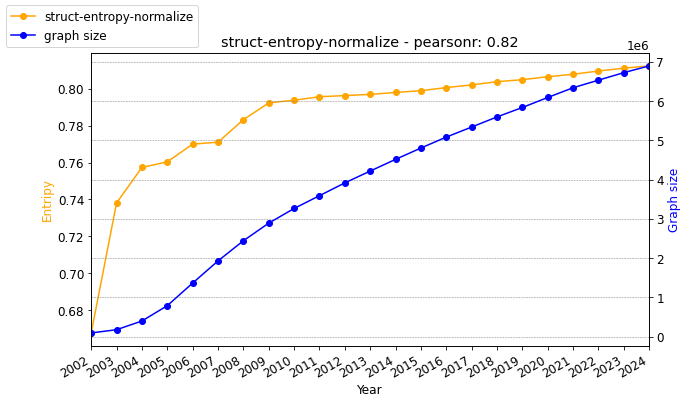

In [168]:

year_range = [year for year in range(start_year, end_year+1)]
node_size_key = 'graph-size'

plt.rcParams['font.size'] = 12

for k,data in entropy_data_map.items():
    if k == node_size_key:
        continue
    
    # plt.figure)
    
    fig, ax1 = plt.subplots(figsize=(10, 6))

    ax1.plot(year_range, data,'orange', label=k, marker='o')  # 第四条线

    ax1.set_xlim(start_year, end_year)
    ax1.set_xticks(year_range)
    ax1.set_xlabel('Year')
    ax1.set_ylabel('Entripy', color='orange')
    
    ax2 = ax1.twinx()
    ax2.plot(year_range, entropy_data_map[node_size_key], 'b-', label="graph size", marker='o')  # 'b-' 表示蓝色实线
    ax2.set_ylabel('Graph size', color='b')
    # ax2.set_yscale('log')
    
    corr_coef, _ = pearsonr(data, entropy_data_map[node_size_key])
    plt.title(f'{k} - pearsonr: {corr_coef:.2f}')
    # plt.title()

    # 获取两个轴的图例句柄和标签
    handles1, labels1 = ax1.get_legend_handles_labels()
    handles2, labels2 = ax2.get_legend_handles_labels()

    # 合并图例句柄和标签
    handles = handles1 + handles2
    labels = labels1 + labels2

    # 使用fig.legend()统一添加图例
    fig.legend(handles, labels, loc='upper left')

    plt.grid(True,axis='both' , which='both', linestyle='--', linewidth=0.5, color='gray')
    # plt.grid(True)
    # 显示图表
    plt.gcf().autofmt_xdate()  # 自动旋转和调整日期标签
    # 添加标题和轴标签
    plt.show()